### Data Importing

In [1]:
from utils import *

In [8]:
missing_values = ["na"]
d_tr = pd.read_csv("aps_failure_training_set_SMALLER.csv",na_values = missing_values)
d_test = pd.read_csv("aps_failure_test_set.csv",na_values = missing_values)

In [9]:
d_tr_n = d_tr.iloc[:,1:].isnull()
d_test_n = d_test.iloc[:,1:].isnull()

In [10]:
print(" Training Data with Train Labels: After Import : Size : ",np.shape(d_tr))
print(" Testing  Data with Test Labels : After Import : Size : ",np.shape(d_test))

 Training Data with Train Labels: After Import : Size :  (19999, 171)
 Testing  Data with Test Labels : After Import : Size :  (16000, 171)


### Data Analysis/Visualisation

In [610]:
#### Method - 1 - Estimated PDF Method
def data_analysis1(d_tr,col_names):

    fig, ax = plt.subplots(len(col_names), figsize=(16,12))

    for i, col_val in enumerate(col_names):

        sns.distplot(d_tr[col_val], hist=True, ax=ax[i])
        ax[i].set_title('Freq dist '+col_val, fontsize=10)
        ax[i].set_xlabel(col_val, fontsize=8)
        ax[i].set_ylabel('Count', fontsize=8)

    plt.show()

C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


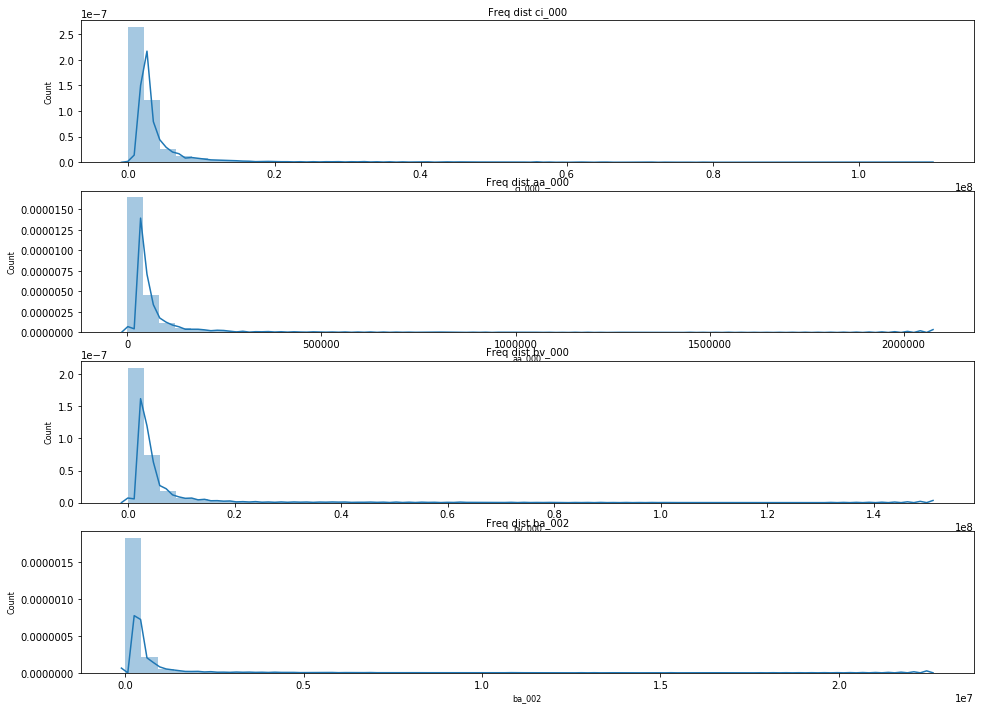

In [612]:
col_names = ['ci_000','aa_000','bv_000','ba_002']
data_analysis1(d_tr_wo_l_2,col_names)

In [23]:
#### Method - 2 - Correlation Method
def data_analysis2(d_tr):
    f, ax = plt.subplots(figsize=(40,40))
    corr = d_tr.corr()
    sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

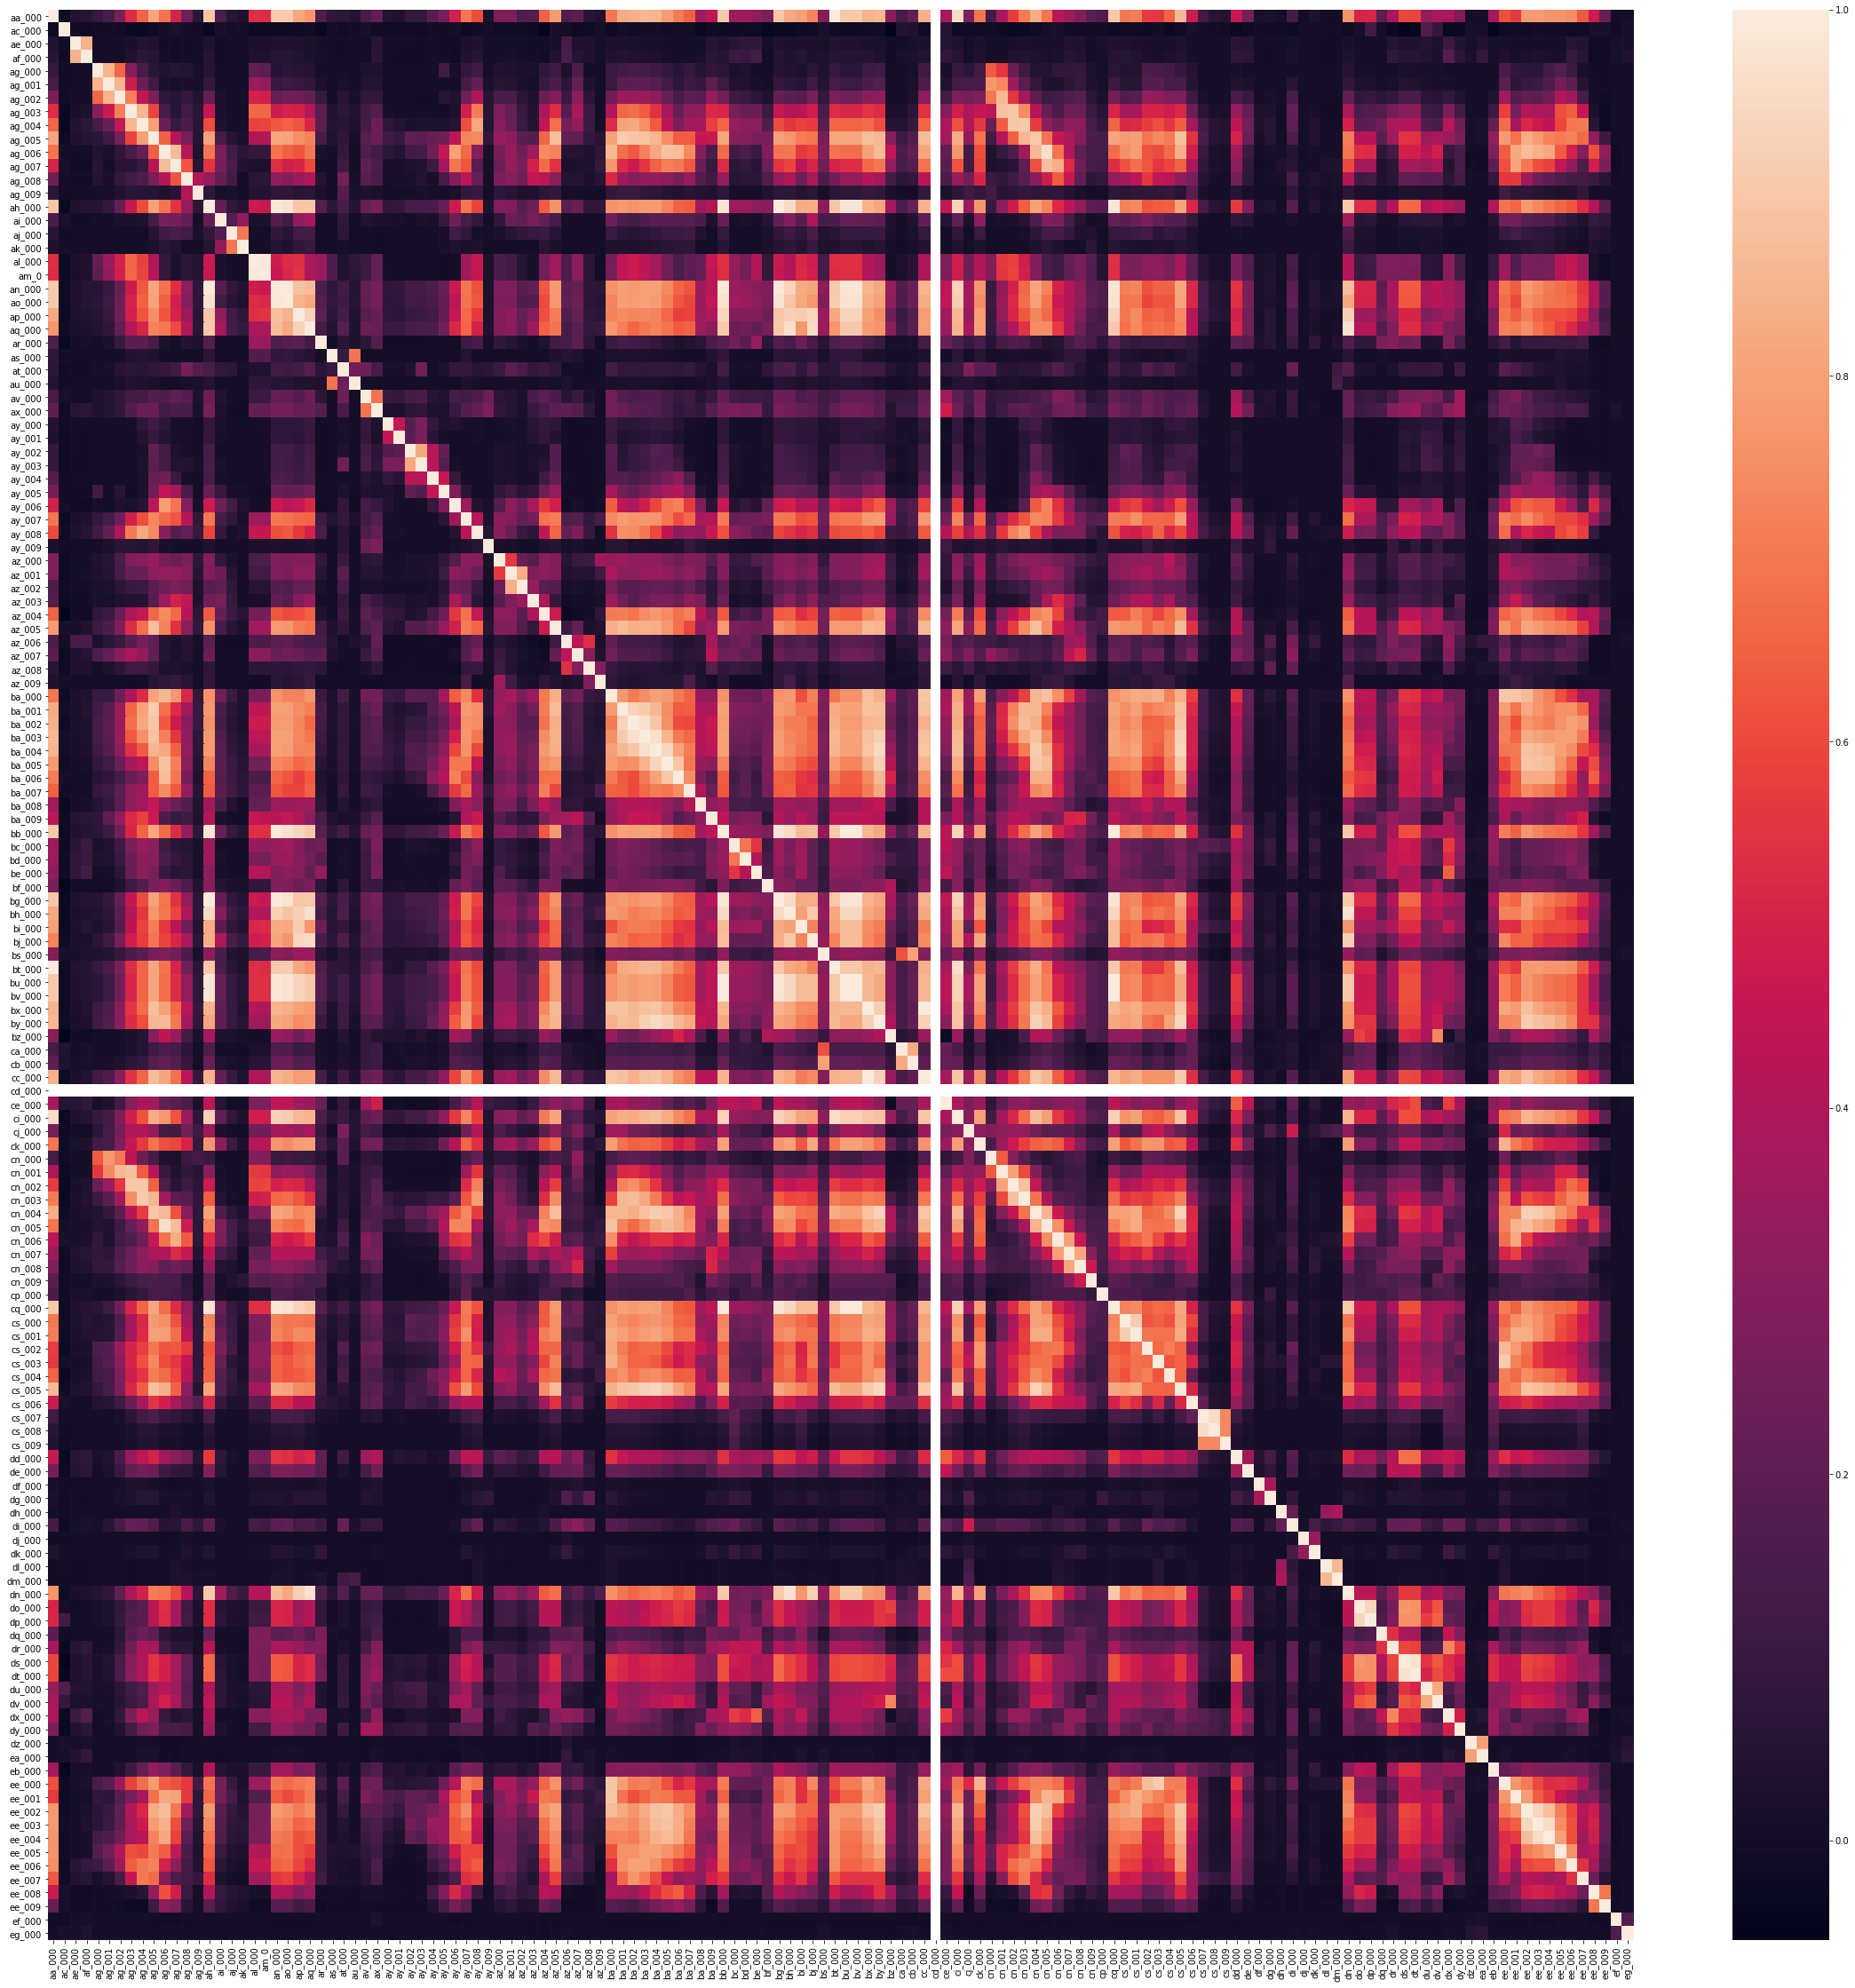

In [24]:
data_analysis2(d_tr)

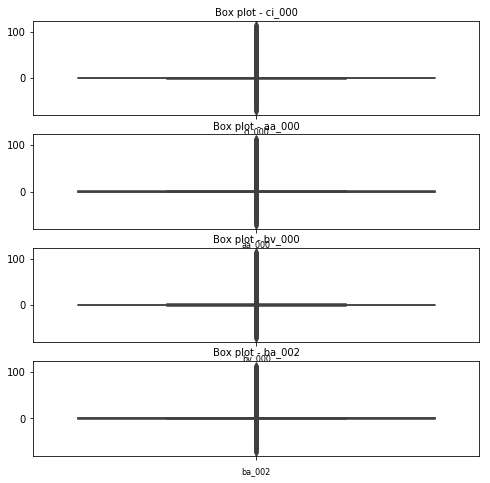

In [584]:
### Method 3 - Box plot
col_names = ['ci_000','aa_000','bv_000','ba_002']

fig, ax = plt.subplots(len(col_names),figsize=(8,8))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=d_tr, ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()


In [616]:
### Method 4 - Variance Threshold


X = d_tr_wo_l_2.iloc[:,1:20]  
y = d_tr_2.iloc[:,1]    
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))  

     Specs         Score
0   ac_000  2.159533e+13
7   ag_004  2.118661e+11
13  ah_000  1.903145e+11
9   ag_006  1.846850e+11
8   ag_005  1.701292e+11
12  ag_009  1.478045e+11
18    am_0  1.298675e+11
6   ag_003  1.178809e+11
10  ag_007  8.173795e+10
17  al_000  8.121032e+10


In [608]:
d_tr_miss = d_tr.isnull().sum()/len(d_tr)*100
d_tr_miss = d_tr_miss.drop(d_tr_miss[d_tr_miss == 0].index).sort_values(ascending = False)
d_tr_miss = pd.DataFrame({'Missing Percentage' : d_tr_miss})
d_tr_miss[0:10]

,Missing Percentage
br_000,82.104105
bq_000,81.299065
bp_000,79.563978
cr_000,77.448872
ab_000,77.448872
bo_000,77.133857
bn_000,73.218661
bm_000,65.888294
bl_000,45.537277
bk_000,38.411921


In [609]:
d_tr_miss[159:169]

,Missing Percentage
cs_009,1.030052
bj_000,1.025051
ao_000,1.025051
aq_000,1.025051
bi_000,1.025051
by_000,0.800040
ci_000,0.600030
cj_000,0.600030
ck_000,0.600030
bt_000,0.275014


### Data Pre-processing

In [11]:
#function to remove the features which contribute less
def data_cleaning(d_tr_n,d_tr,d_test):
    column_arr = [];
    for i in range(0,len(d_tr_n.columns)):
        na_count = 0;
        for j in range(0,len(d_tr_n)):
            if (d_tr_n.iloc[j,i] == True):
                na_count +=1;
        
        if na_count >= 2000:
            column_arr.append(i+1);
        
    d_tr.drop(d_tr.columns[column_arr],inplace = True, axis = 1);
    d_test.drop(d_test.columns[column_arr],inplace = True, axis = 1);
    
    d_tr_wo_l = d_tr.iloc[:,1:]
    d_test_wo_l = d_test.iloc[:,1:]

    return d_tr,d_tr_wo_l,d_test,d_test_wo_l;


In [12]:
d_tr_1,d_tr_wo_l_1,d_test_1,d_test_wo_l_1 = data_cleaning(d_tr_n,d_tr,d_test)
 

In [13]:
d_tr_1.shape

(19999, 143)

In [14]:
print(" Training Data with Train Labels : After Data Cleaning : Size : ",np.shape(d_tr_1))
print(" Testing  Data with Test Labels  : After Data Cleaning : Size : ",np.shape(d_test_1))

 Training Data with Train Labels : After Data Cleaning : Size :  (19999, 143)
 Testing  Data with Test Labels  : After Data Cleaning : Size :  (16000, 143)


### Data Integration  - Missing Value Imputation - Method 1

In [15]:
#Missing value Imputation by taking means of each feature
def Missing_imputation1(d_tr,d_test):
    
    feature_means = [];
    for j in range(1,len(d_tr.columns)):
        feature_means.append(np.mean(d_tr.iloc[:,j]));

    for j in range(1,len(d_tr.columns)):
        for i in range(0,len(d_tr)):
            if mt.isnan(d_tr.iloc[i,j]) == True:
                d_tr.iloc[i,j] = feature_means[j-1];
                
    for j in range(1,len(d_test.columns)):
        for i in range(0,len(d_test)):
            if mt.isnan(d_test.iloc[i,j]) == True:
                d_test.iloc[i,j] = feature_means[j-1]
                
                

    d_tr_wo_l = d_tr.iloc[:,1:]
    d_test_wo_l = d_test.iloc[:,1:]
    
    return d_tr,d_test,d_tr_wo_l,d_test_wo_l;

            
    
    

In [16]:
d_tr_2,d_test_2,d_tr_wo_l_2,d_test_wo_l_2 = Missing_imputation1(d_tr_1,d_test_1)

In [17]:
print(" Training Data with Train Labels : After Missing value Imputation Method 1 : Size : ",np.shape(d_tr_2))
print(" Testing  Data with Test Labels  : After Missing value Imputation Method 1 : Size : ",np.shape(d_test_2))

 Training Data with Train Labels : After Missing value Imputation Method 1 : Size :  (19999, 143)
 Testing  Data with Test Labels  : After Missing value Imputation Method 1 : Size :  (16000, 143)


### Random Forest Classifier to explain Feature Importance - Method 1

In [497]:
def RF_classifier4(d_tr,l_tr,d_test,l_test):
    model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

    model.fit(d_tr,l_tr)
    RF_pr_tr = model.predict(d_tr)
    RF_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    imp = model.feature_importances_
    return RF_pr_tr,RF_pr_test,prob,imp;

In [499]:
RF_pr_tr, RF_pr_test,prob,imp = RF_classifier4(d_tr_bal_bPCA, l_tr_baPCA, d_test_bPCA, l_test_baPCA)

[Text(0,0.5,'Features'), Text(0.5,0,'Importance')]

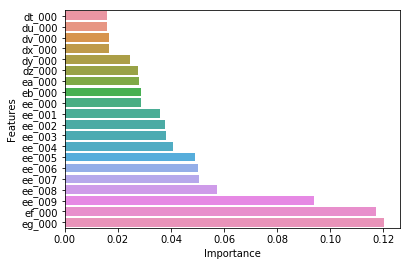

In [513]:

features = d_tr_2.columns[1:]
Importance_table = np.column_stack((features,imp))
indices = np.argsort(imp)
imp = np.sort(imp)
features_sorted = [];
for i in range(0,len(d_tr_2.columns[1:])):
    features_sorted.append(features[indices[i]])
ax = sns.barplot(imp[122:142], features_sorted[122:142])
ax.set(xlabel='Importance', ylabel='Features')


### Random Forest Classifier to explain Feature Importance - Method 2

In [527]:
lr = RandomForestClassifier()
lr.fit(d_tr_wo_l_2,d_tr['class'])
rfe = RFE(lr,10 )
rfe.fit(d_tr_wo_l_2,d_tr_3['class'])


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their rank:
[  1 130 133 131 124   4   1  37   1  18   7  38  85  61  76  12  68 115
   1   2  22  40 101   1 104 120  44 117  87 103  71  13  51  91  92   1
  11 102   9  14  88  27   8  46  43  55  86  82 107 113 118  21  32 106
  48  17  26  39 100  80  77  81  66  49  96  65  16  25   1  29  89  59
  33  70  90  57  62  34  31 132  98   1 111  19  47   1  95 112  58  84
  24   3  23  69  79  56  54  78  41  28  75  42  15  30  94 129  53  52
 114  67 116 109 122 123 128 127  10  74  72 105  60  64  36  99  97  93
  83 126 125 108  73  63  20  35  45   1  50   5   6 110 121 119]


In [529]:
ranking = rfe.ranking_
features = d_tr_2.columns[1:]
imp_table = np.column_stack((features,ranking))
print(imp_table)

[['aa_000' 1]
 ['ac_000' 130]
 ['ae_000' 133]
 ['af_000' 131]
 ['ag_000' 124]
 ['ag_001' 4]
 ['ag_002' 1]
 ['ag_003' 37]
 ['ag_004' 1]
 ['ag_005' 18]
 ['ag_006' 7]
 ['ag_007' 38]
 ['ag_008' 85]
 ['ag_009' 61]
 ['ah_000' 76]
 ['ai_000' 12]
 ['aj_000' 68]
 ['ak_000' 115]
 ['al_000' 1]
 ['am_0' 2]
 ['an_000' 22]
 ['ao_000' 40]
 ['ap_000' 101]
 ['aq_000' 1]
 ['ar_000' 104]
 ['as_000' 120]
 ['at_000' 44]
 ['au_000' 117]
 ['av_000' 87]
 ['ax_000' 103]
 ['ay_000' 71]
 ['ay_001' 13]
 ['ay_002' 51]
 ['ay_003' 91]
 ['ay_004' 92]
 ['ay_005' 1]
 ['ay_006' 11]
 ['ay_007' 102]
 ['ay_008' 9]
 ['ay_009' 14]
 ['az_000' 88]
 ['az_001' 27]
 ['az_002' 8]
 ['az_003' 46]
 ['az_004' 43]
 ['az_005' 55]
 ['az_006' 86]
 ['az_007' 82]
 ['az_008' 107]
 ['az_009' 113]
 ['ba_000' 118]
 ['ba_001' 21]
 ['ba_002' 32]
 ['ba_003' 106]
 ['ba_004' 48]
 ['ba_005' 17]
 ['ba_006' 26]
 ['ba_007' 39]
 ['ba_008' 100]
 ['ba_009' 80]
 ['bb_000' 77]
 ['bc_000' 81]
 ['bd_000' 66]
 ['be_000' 49]
 ['bf_000' 96]
 ['bg_000' 65]
 ['bh_0

### Data Transformation - Label Encoding, Data Normalisation

In [18]:
def Label_encoding(d_tr,d_test):
    encoder = preprocessing.LabelEncoder()
    encoder.fit(d_tr['class'])
    d_tr['class'] = encoder.transform(d_tr['class'])
    d_test['class'] = encoder.transform(d_test['class'])
    return d_tr,d_test

In [19]:
d_tr_3,d_test_3 = Label_encoding(d_tr_2,d_test_2)

In [20]:
def data_std(d_tr,d_test):
    scaler = StandardScaler()
    scaler.fit(d_tr)
    preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    d_tr_std = scaler.transform(d_tr)
    d_test_std = scaler.transform(d_test)
    return d_tr_std,d_test_std;

In [21]:
d_tr_4,d_test_4 = data_std(d_tr_wo_l_2,d_test_wo_l_2)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [22]:
print(" Training Data without Train Labels : After Data Transformation : Size : ",np.shape(d_tr_4))
print(" Testing  Data without Test Labels  : After Data Transformation : Size : ",np.shape(d_test_4))

 Training Data without Train Labels : After Data Transformation : Size :  (19999, 142)
 Testing  Data without Test Labels  : After Data Transformation : Size :  (16000, 142)


In [23]:
pk_wr = open("d_tr_imb.pickle","wb")
pickle.dump(d_tr_4, pk_wr)
pk_wr.close()

pk_wr = open("l_tr_imb.pickle","wb")
pickle.dump(d_tr_3['class'], pk_wr)
pk_wr.close()


### Compensation for Unbalanced data

In [24]:
def data_SMOTE(d_tr_std,d_tr):
    l_tr_imb = d_tr.get('class') 
    d_tr_imb = d_tr_std
    sm = SMOTE(sampling_strategy = 'minority')
    d_tr_bal,l_tr_bal = sm.fit_resample(d_tr_imb,l_tr_imb)
    return d_tr_bal,l_tr_bal;

In [25]:
d_tr_bal,l_tr_bal = data_SMOTE(d_tr_4,d_tr_3)

In [26]:
np.shape(d_tr_bal)

(39332, 142)

In [28]:
print(" Training Data without Train Labels: After Balanced : Size : ",np.shape(d_tr_bal))
print(" Testing  Data without Test Labels  : After balanced : Size : ",np.shape(d_test_4))

 Training Data without Train Labels: After Balanced : Size :  (39332, 142)
 Testing  Data without Test Labels  : After balanced : Size :  (16000, 142)


In [29]:
pk_wr = open("d_tr_bal_bPCA.pickle","wb")
pickle.dump(d_tr_bal, pk_wr)
pk_wr.close()

pk_wr = open("l_tr_baPCA.pickle","wb")
pickle.dump(l_tr_bal, pk_wr)
pk_wr.close()

pk_wr = open("d_test_bPCA.pickle","wb")
pickle.dump(d_test_4, pk_wr)
pk_wr.close()

pk_wr = open("l_test_baPCA.pickle","wb")
pickle.dump(d_test_3['class'], pk_wr)
pk_wr.close()

### Feature extraction and Dimensionality Reduction

In [31]:
#PCA for Dimensionality Reduction
def PCA_dr(d_tr,d_tr_imb,d_test):
    for i in np.arange(0.8,1,0.01):
        
        pca = PCA(i)
        pca.fit(d_tr)
        d_tr_bal_pca = pca.transform(d_tr)
        d_tr_imb_pca = pca.transform(d_tr_imb)
        d_test_pca = pca.transform(d_test)
        No_features = (pca.explained_variance_ratio_)
        #print(No_features)
        var = np.sum(No_features)
        if (i >0.95 and len(No_features) >= (0.8*len(d_tr[0]))):
            break;
    return (d_tr_bal_pca,d_tr_imb_pca,d_test_pca)

In [32]:
d_tr_bal_pca,d_tr_imb_pca,d_test_pca = PCA_dr(d_tr_bal,d_tr_4,d_test_4)


In [33]:
np.shape(d_tr_4)

(19999, 142)

In [34]:
print(" Training Data without Train Labels: After PCA : Size : ",np.shape(d_tr_bal_pca))
print(" Testing  Data without Test Labels : After PCA : Size : ",np.shape(d_test_pca))

 Training Data without Train Labels: After PCA : Size :  (39332, 79)
 Testing  Data without Test Labels : After PCA : Size :  (16000, 79)


### 

In [35]:
pk_wr = open("d_tr_bal_aPCA.pickle","wb")
pickle.dump(d_tr_bal_pca, pk_wr)
pk_wr.close()

pk_wr = open("d_test_aPCA.pickle","wb")
pickle.dump(d_test_pca, pk_wr)
pk_wr.close()

pk_wr = open("d_tr_imb_aPCA.pickle","wb")
pickle.dump(d_tr_imb_pca, pk_wr)
pk_wr.close()




### Functions to get all the metrics

In [41]:
#function to find the accuracy of a classifier --works

def data_acc(ac,pr):
    count = 0;
    for i in  range(0, len(ac)):
        if(ac[i] == pr[i]):
            count += 1;

    ac_perc = (count/len(ac))*100;
    return ac_perc;

In [42]:
#function to get the confusion matrix of a classifier

def data_conf_matrix(ac,pr,ac_imb,pr_imb):
    x = confusion_matrix(ac,pr)
    x1 = confusion_matrix(ac_imb,pr_imb)
    sns.heatmap(x, annot=True, fmt="d")    
    return x,x1;

In [43]:
#function to get the ROC curves

def data_rocauc(ac,pr,probabilities):
    prob = probabilities[:,1]
    F_P_rate,T_P_rate,Thres = roc_curve(ac,prob)
    AUC_score = roc_auc_score(ac,prob)
    plt.figure()
    plt.plot(F_P_rate,T_P_rate,marker='.')
   
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    return AUC_score,Thres;



In [44]:
#function to get the classification report

def data_report(ac,pr):
    class_report = classification_report(ac,pr)
    return class_report

In [45]:
#function to get precision-recall curves

def data_prcurve(ac,pr):
    prec,reca,thr = precision_recall_curve(ac,pr)
    #plt.plot(thr,prec[:-1],'r--',label = 'Precision')
    plt.plot(reca,prec,'b')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()

In [46]:
def cost_function(c_mat):
    Tot_ac = np.sum(np.sum(c_mat))
    T_P = c_mat[1,1]
    F_P = c_mat[0,1]
    F_N = c_mat[1,0]
    T_N = c_mat[0,0]
    Sens =  T_P/(T_P + F_P)
    Spec= T_N/(F_N+T_N)
    Precision = T_P/(T_P + F_P)
    Recall = T_P/(T_P + F_N)
    F1_score = 2* ((Precision*Recall)/(Precision+Recall))
    FPR = F_P/(F_P+T_N)
    TPR = T_P/(T_P+F_N)
    cost_1 = 10
    cost_2 = 500
    
    Total_cost = cost_1*F_P + cost_2*F_N
    
    return Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost



    

### Naive Baye's classifier

In [37]:
pk_rd = open("d_tr_bal_bPCA.pickle","rb")
d_tr_bal_bPCA = pickle.load(pk_rd)

pk_rd = open("l_tr_baPCA.pickle","rb")
l_tr_baPCA = pickle.load(pk_rd)

pk_rd = open("d_test_bPCA.pickle","rb")
d_test_bPCA = pickle.load(pk_rd)

pk_rd = open("l_test_baPCA.pickle","rb")
l_test_baPCA = pickle.load(pk_rd)

pk_rd = open("d_tr_imb.pickle","rb")
d_tr_imb = pickle.load(pk_rd)


pk_rd = open("l_tr_imb.pickle","rb")
l_tr_imb = pickle.load(pk_rd)

In [351]:
np.shape(d_tr_bal_bPCA)

(39332, 142)

In [352]:
#function to find Gaussian Classifier
def NB_classifier(d_tr,l_tr,d_tr_imb,d_test,l_test):
    model = GaussianNB()
    model.fit(d_tr,l_tr)
    NB_pr_tr = model.predict(d_tr)
    NB_pr_tr_imb = model.predict(d_tr_imb)
    NB_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return NB_pr_tr,NB_pr_tr_imb,NB_pr_test,prob;

### Naive Baye's Classifier without Dimension Reduction(PCA)

In [569]:
start = time.time()
NB_pr_tr, NB_pr_tr_imb, NB_pr_test,prob = NB_classifier(d_tr_bal_bPCA, l_tr_baPCA, d_tr_imb, d_test_bPCA, l_test_baPCA)
end = time.time()
print("The execution time for Naive Baye's classifier without PCA is ",(end-start),"s")

The execution time for Naive Baye's classifier without PCA is  1.0252132415771484 s


In [354]:
t_ac = data_acc(l_tr_baPCA,NB_pr_tr)
print("The training accuracy for Naive Baye's classifier without PCA is",t_ac)
test_ac = data_acc(l_test_baPCA,NB_pr_test)
print("The testing accuracy for Naive Baye's classifier without PCA is",test_ac)

The training accuracy for Naive Baye's classifier without PCA is 93.60317298891488
The testing accuracy for Naive Baye's classifier without PCA is 96.5625


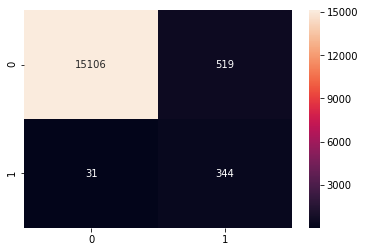

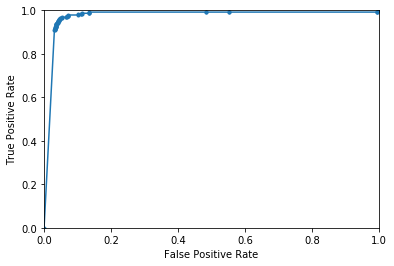

The AUC score for Naive Baye's classifier is 0.9733794133333332


In [362]:
c_mat_test,c_mat_imb = data_conf_matrix(l_test_baPCA,
                                        NB_pr_test,
                                        l_tr_imb,
                                        NB_pr_tr_imb)

AUC_score,Thres = data_rocauc(l_test_baPCA,
                            NB_pr_test,
                            prob)

print("The AUC score for Naive Baye's classifier is",AUC_score)


In [363]:
cl_rep = data_report(l_test_baPCA,
                     NB_pr_test)
print(cl_rep)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.40      0.92      0.56       375

   micro avg       0.97      0.97      0.97     16000
   macro avg       0.70      0.94      0.77     16000
weighted avg       0.98      0.97      0.97     16000



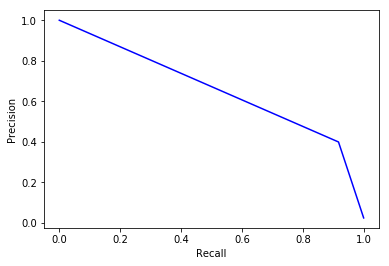

In [364]:
data_prcurve(l_test_baPCA,NB_pr_test)

In [367]:
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(c_mat_test)
print("Total accuracy = ",Tot_ac)
print("Sensitivity = ",Sens)
print("Specificity = ",Spec)
print("F1 score = ",F1_score)
print("Precision = ",Precision)
print("Recall = ",Recall)
print("FPR = ",FPR )
print("TPR = ",TPR)
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost1 = cost_function(c_mat_imb)
print("Total cost for training data = ",Total_cost1)
print("Total cost for test data = ",Total_cost)


Total accuracy =  16000
Sensitivity =  0.3986095017381228
Specificity =  0.9979520380524542
F1 score =  0.555735056542811
Precision =  0.3986095017381228
Recall =  0.9173333333333333
FPR =  0.033216
TPR =  0.9173333333333333
Total cost for training data =  20090
Total cost for test data =  20690


### Naive Baye's Classifier with Dimension Reduction(PCA)

In [ ]:
pk_rd = open("d_tr_bal_aPCA.pickle","rb")
d_tr_bal_aPCA = pickle.load(pk_rd)


pk_rd = open("d_test_aPCA.pickle","rb")
d_test_aPCA = pickle.load(pk_rd)

pk_rd = open("d_tr_imb_aPCA.pickle","rb")
d_tr_imb_aPCA = pickle.load(pk_rd)

pk_rd = open("l_tr_imb.pickle","rb")
l_tr_aPCA_imb = pickle.load(pk_rd)


In [568]:
start = time.time();
NB_pr_tr_aPCA,NB_pr_tr_aPCA_imb,NB_pr_test_aPCA,prob = NB_classifier(d_tr_bal_aPCA,l_tr_baPCA,d_tr_imb_aPCA,d_test_aPCA,l_test_baPCA)
end = time.time()
print("The execution time for Naive Baye's with PCA is ",(end-start),"s")

The execution time for Naive Baye's with PCA is  0.729372501373291 s


In [372]:
t_ac = data_acc(l_tr_baPCA,NB_pr_tr_aPCA)
print("The training accuracy for Naive Baye's classifier with PCA is",t_ac)
test_ac = data_acc(l_test_baPCA,NB_pr_test_aPCA)
print("The testing accuracy for Naive Baye's classifier with PCA is",test_ac)

The training accuracy for Naive Baye's classifier with PCA is 89.68524356757857
The testing accuracy for Naive Baye's classifier with PCA is 96.3875


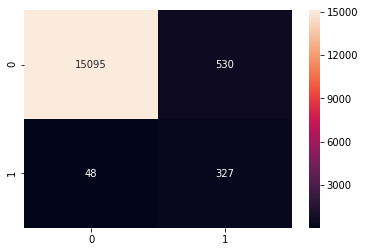

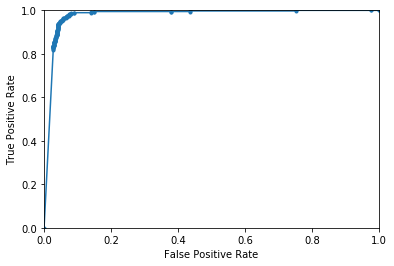

The AUC score for Naive Baye's classifier is 0.97755392


In [373]:
c_mat_test,c_mat_imb = data_conf_matrix(l_test_baPCA,
                                        NB_pr_test_aPCA,
                                        l_tr_aPCA_imb,
                                        NB_pr_tr_aPCA_imb)

AUC_score,Thres = data_rocauc(l_test_baPCA,
                            NB_pr_test_aPCA,
                            prob)

print("The AUC score for Naive Baye's classifier is",AUC_score)


In [374]:
cl_rep = data_report(l_test_baPCA,
                     NB_pr_test_aPCA)
print(cl_rep)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.38      0.87      0.53       375

   micro avg       0.96      0.96      0.96     16000
   macro avg       0.69      0.92      0.76     16000
weighted avg       0.98      0.96      0.97     16000



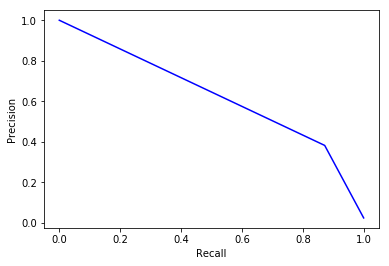

In [375]:
data_prcurve(l_test_baPCA,NB_pr_test_aPCA)

In [376]:
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(c_mat_test)
print("Total accuracy = ",Tot_ac)
print("Sensitivity = ",Sens)
print("Specificity = ",Spec)
print("F1 score = ",F1_score)
print("Precision = ",Precision)
print("Recall = ",Recall)
print("FPR = ",FPR )
print("TPR = ",TPR)
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost1 = cost_function(c_mat_imb)
print("Total cost for training data = ",Total_cost1)
print("Total cost for test data = ",Total_cost)


Total accuracy =  16000
Sensitivity =  0.38156359393232203
Specificity =  0.9968302185828436
F1 score =  0.5308441558441559
Precision =  0.38156359393232203
Recall =  0.872
FPR =  0.03392
TPR =  0.872
Total cost for training data =  27010
Total cost for test data =  29300


### Naive Baye's classifier with Average Cost using Stratified K-fold Cross Validation

In [380]:
#function to find Gaussian Classifier with cross validation
def NB_classifier1(d_tr,l_tr,d_test,l_test):
    model = GaussianNB()
    model.fit(d_tr,l_tr)
    NB_pr_tr = model.predict(d_tr)
    NB_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return NB_pr_tr,NB_pr_test,prob;

In [409]:
from sklearn.model_selection import StratifiedKFold
tr_acs = [];
test_acs = [];
tr_cost = [];
test_cost = [];
Tot_accs = [];
Senss = [];
Specs = [];
Precisions = [];
Recalls = [];
F1_scores = [];
FPRs = [];
TPRs = [];

obj = StratifiedKFold(n_splits = 5,random_state = None, shuffle = True)
#obj.get_n_splits(data_train_after_PCA,label_train_beforeafter_PCA)
for id_tr,id_test in obj.split(d_tr_bal_aPCA,l_tr_baPCA):
    d_tr, d_test = d_tr_bal_aPCA[id_tr], d_tr_bal_aPCA[id_test]
    l_tr, l_test = l_tr_baPCA[id_tr], l_tr_baPCA[id_test]
    tr_pr,test_pr,probs = NB_classifier1(d_tr, l_tr, d_test, l_test)
    tr_ac = data_acc(l_tr,tr_pr)
    tr_acs.append(tr_ac)
    
    test_ac = data_acc(l_test,test_pr)
    test_acs.append(test_ac)
    
    x = confusion_matrix(l_test,test_pr)
    Tot_acc,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(x)
    
    x1 = confusion_matrix(l_tr,tr_pr)
    Tot_ac_tr,Sens_tr,Spec_tr,Precision_tr,Recall_tr,F1_score_tr,FPR_tr,TPR_tr,Total_cost1 = cost_function(x1)
    
    Tot_accs.append(Tot_acc)
    Senss.append(Sens)
    Specs.append(Spec)
    Precisions.append(Precision)
    Recalls.append(Recall)
    F1_scores.append(F1_score)
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    tr_cost.append(Total_cost1)
    test_cost.append(Total_cost)
    
    
    
    

In [410]:
print("The training accuracy for Naive Baye's with cross validation is ",np.mean(tr_acs))
print("The testing accuracy for Naive Baye's with cross validation is ",np.mean(test_acs))
print("Sensitivity is ",np.mean(Senss))
print("Specificity is ",np.mean(Specs))
print("Precision is ",np.mean(Precisions))
print("Recall is ",np.mean(Recalls))
print("F1 score is ",np.mean(F1_scores))
print("FPR is ",np.mean(FPRs))
print("TPR is ",np.mean(TPRs))
print("Training data cost is ",np.mean(tr_cost))
print("Testing data cost is ",np.mean(test_cost))

The training accuracy for Naive Baye's with cross validation is  89.65918334738278
The testing accuracy for Naive Baye's with cross validation is  89.65983283030931
Sensitivity is  0.958241778668207
Specificity is  0.8495996012940321
Precision is  0.958241778668207
Recall is  0.8293505826043266
F1 score is  0.8891369260511641
FPR is  0.036153925998140435
TPR is  0.8293505826043266
Training data cost is  1348580.0
Testing data cost is  337022.0


### SVM classifier

In [390]:
def SVM_classifier(d_tr,l_tr,d_tr_imb,d_test,l_test):
    model = svm.SVC(C = 1,gamma = 'scale',kernel = 'rbf',probability = True)
    model.fit(d_tr,l_tr)
    SVM_pr_tr = model.predict(d_tr)
    SVM_pr_tr_imb = model.predict(d_tr_imb)
    SVM_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    return SVM_pr_tr,SVM_pr_tr_imb,SVM_pr_test,prob;

In [570]:
start = time.time()
SVM_pr_tr, SVM_pr_tr_imb, SVM_pr_test,prob = SVM_classifier(d_tr_bal_bPCA, l_tr_baPCA, d_tr_imb, d_test_bPCA, l_test_baPCA)
end = time.time()
print("The execution time for SVM classifier without PCA is ",(end-start),"s")

The execution time for SVM classifier without PCA is  746.5786824226379 s


In [392]:
t_ac = data_acc(l_tr_baPCA,SVM_pr_tr)
print("The training acSVMcuracy for SVM classifier without PCA is",t_ac)
test_ac = data_acc(l_test_baPCA,SVM_pr_test)
print("The testing accuracy for SVM classifier without PCA is",test_ac)

The training acSVMcuracy for SVM classifier without PCA is 97.4397437201261
The testing accuracy for SVM classifier without PCA is 98.1


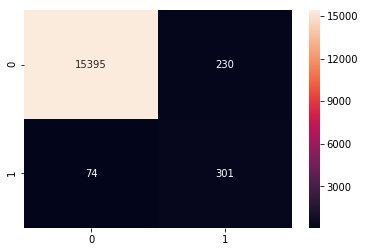

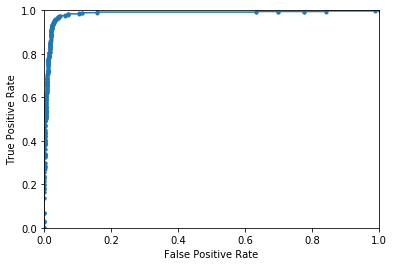

The AUC score for SVM classifier is 0.9845579093333335


In [395]:
c_mat_test,c_mat_imb = data_conf_matrix(l_test_baPCA,
                                        SVM_pr_test,
                                        l_tr_imb,
                                        SVM_pr_tr_imb)

AUC_score,Thres = data_rocauc(l_test_baPCA,
                            SVM_pr_test,
                            prob)

print("The AUC score for SVM classifier is",AUC_score)


In [396]:
cl_rep = data_report(l_test_baPCA,
                     SVM_pr_test)
print(cl_rep)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.57      0.80      0.66       375

   micro avg       0.98      0.98      0.98     16000
   macro avg       0.78      0.89      0.83     16000
weighted avg       0.99      0.98      0.98     16000



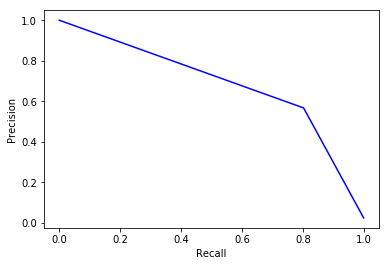

In [397]:
data_prcurve(l_test_baPCA,SVM_pr_test)

In [398]:
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(c_mat_test)
print("Total accuracy = ",Tot_ac)
print("Sensitivity = ",Sens)
print("Specificity = ",Spec)
print("F1 score = ",F1_score)
print("Precision = ",Precision)
print("Recall = ",Recall)
print("FPR = ",FPR )
print("TPR = ",TPR)
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost1 = cost_function(c_mat_imb)
print("Total cost for training data = ",Total_cost1)
print("Total cost for test data = ",Total_cost)


Total accuracy =  16000
Sensitivity =  0.5668549905838042
Specificity =  0.9952162389294719
F1 score =  0.6644591611479029
Precision =  0.5668549905838042
Recall =  0.8026666666666666
FPR =  0.01472
TPR =  0.8026666666666666
Total cost for training data =  7800
Total cost for test data =  39300


### SVM's Classifier with Dimension Reduction(PCA)

In [399]:
pk_rd = open("d_tr_bal_aPCA.pickle","rb")
d_tr_bal_aPCA = pickle.load(pk_rd)


pk_rd = open("d_test_aPCA.pickle","rb")
d_test_aPCA = pickle.load(pk_rd)

pk_rd = open("d_tr_imb_aPCA.pickle","rb")
d_tr_imb_aPCA = pickle.load(pk_rd)

pk_rd = open("l_tr_imb.pickle","rb")
l_tr_aPCA_imb = pickle.load(pk_rd)


In [571]:
start = time.time()
SVM_pr_tr_aPCA,SVM_pr_tr_aPCA_imb,SVM_pr_test_aPCA,prob = SVM_classifier(d_tr_bal_aPCA,l_tr_baPCA,d_tr_imb_aPCA,d_test_aPCA,l_test_baPCA)
end = time.time()
print("The execution time for SVM classifier without PCA is ",(end-start),"s")

The execution time for SVM classifier without PCA is  814.1449246406555 s


In [401]:
t_ac = data_acc(l_tr_baPCA,SVM_pr_tr_aPCA)
print("The training accuracy for SVM's classifier with PCA is",t_ac)
test_ac = data_acc(l_test_baPCA,SVM_pr_test_aPCA)
print("The testing accuracy for SVM's classifier with PCA is",test_ac)

The training accuracy for SVM's classifier with PCA is 97.1854978134852
The testing accuracy for SVM's classifier with PCA is 98.02499999999999


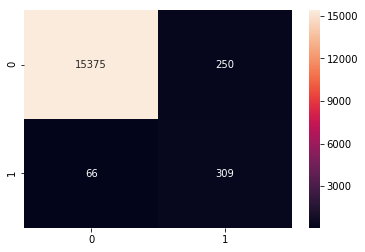

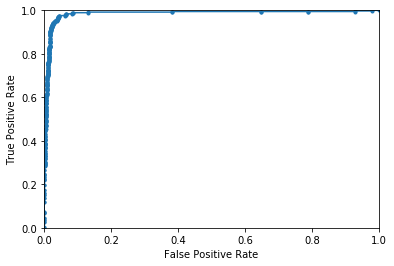

The AUC score for SVM's classifier is 0.9851250346666668


In [402]:
c_mat_test,c_mat_imb = data_conf_matrix(l_test_baPCA,
                                        SVM_pr_test_aPCA,
                                        l_tr_aPCA_imb,
                                        SVM_pr_tr_aPCA_imb)

AUC_score,Thres = data_rocauc(l_test_baPCA,
                            SVM_pr_test_aPCA,
                            prob)

print("The AUC score for SVM's classifier is",AUC_score)


In [403]:
cl_rep = data_report(l_test_baPCA,
                     SVM_pr_test_aPCA)
print(cl_rep)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.55      0.82      0.66       375

   micro avg       0.98      0.98      0.98     16000
   macro avg       0.77      0.90      0.83     16000
weighted avg       0.99      0.98      0.98     16000



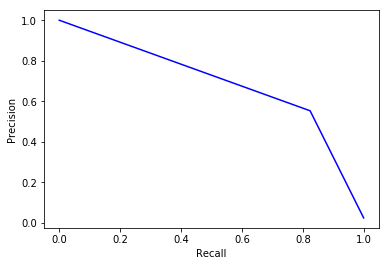

In [404]:
data_prcurve(l_test_baPCA,SVM_pr_test_aPCA)

In [405]:
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(c_mat_test)
print("Total accuracy = ",Tot_ac)
print("Sensitivity = ",Sens)
print("Specificity = ",Spec)
print("F1 score = ",F1_score)
print("Precision = ",Precision)
print("Recall = ",Recall)
print("FPR = ",FPR )
print("TPR = ",TPR)
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost1 = cost_function(c_mat_imb)
print("Total cost for training data = ",Total_cost1)
print("Total cost for test data = ",Total_cost)


Total accuracy =  16000
Sensitivity =  0.552772808586762
Specificity =  0.9957256654361765
F1 score =  0.6616702355460385
Precision =  0.552772808586762
Recall =  0.824
FPR =  0.016
TPR =  0.824
Total cost for training data =  8100
Total cost for test data =  35500


### SVM classifier with Average Cost using Stratified K-fold Cross Validation

In [406]:
#function to find Gaussian Classifier with cross validation
def SVM_classifier1(d_tr,l_tr,d_test,l_test):
    model = svm.SVC(C = 1,gamma = 'scale',kernel = 'rbf',probability = True)
    model.fit(d_tr,l_tr)
    NB_pr_tr = model.predict(d_tr)
    NB_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return NB_pr_tr,NB_pr_test,prob;

In [411]:
from sklearn.model_selection import StratifiedKFold
tr_acs = [];
test_acs = [];
tr_cost = [];
test_cost = [];
Tot_accs = [];
Senss = [];
Specs = [];
Precisions = [];
Recalls = [];
F1_scores = [];
FPRs = [];
TPRs = [];

obj = StratifiedKFold(n_splits = 5,random_state = None, shuffle = True)
#obj.get_n_splits(data_train_after_PCA,label_train_beforeafter_PCA)
for id_tr,id_test in obj.split(d_tr_bal_aPCA,l_tr_baPCA):
    d_tr, d_test = d_tr_bal_aPCA[id_tr], d_tr_bal_aPCA[id_test]
    l_tr, l_test = l_tr_baPCA[id_tr], l_tr_baPCA[id_test]
    tr_pr,test_pr,probs = NB_classifier1(d_tr, l_tr, d_test, l_test)
    tr_ac = data_acc(l_tr,tr_pr)
    tr_acs.append(tr_ac)
    
    test_ac = data_acc(l_test,test_pr)
    test_acs.append(test_ac)
    
    x = confusion_matrix(l_test,test_pr)
    Tot_acc,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(x)
    
    x1 = confusion_matrix(l_tr,tr_pr)
    Tot_ac_tr,Sens_tr,Spec_tr,Precision_tr,Recall_tr,F1_score_tr,FPR_tr,TPR_tr,Total_cost1 = cost_function(x1)
    
    Tot_accs.append(Tot_acc)
    Senss.append(Sens)
    Specs.append(Spec)
    Precisions.append(Precision)
    Recalls.append(Recall)
    F1_scores.append(F1_score)
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    tr_cost.append(Total_cost1)
    test_cost.append(Total_cost)
    
    
    
    

In [412]:
print("The training accuracy for SVM's with cross validation is ",np.mean(tr_acs))
print("The testing accuracy for SVM's with cross validation is ",np.mean(test_acs))
print("Sensitivity is ",np.mean(Senss))
print("Specificity is ",np.mean(Specs))
print("Precision is ",np.mean(Precisions))
print("Recall is ",np.mean(Recalls))
print("F1 score is ",np.mean(F1_scores))
print("FPR is ",np.mean(FPRs))
print("TPR is ",np.mean(TPRs))
print("Training data cost is ",np.mean(tr_cost))
print("Testing data cost is ",np.mean(test_cost))

The training accuracy for SVM's with cross validation is  89.69732132426171
The testing accuracy for SVM's with cross validation is  89.69796713145493
Sensitivity is  0.9587630818958539
Specificity is  0.8498713618896051
Precision is  0.9587630818958539
Recall is  0.8296553183464102
F1 score is  0.8895447550319003
FPR is  0.03569597571731174
TPR is  0.8296553183464102
Training data cost is  1345030.0
Testing data cost is  336404.0


### SVM classifier Model Selection

In [413]:
#function to find Gaussian Classifier with cross validation
def SVM_classifier2(d_tr,l_tr,d_test,l_test,i):
    model = svm.SVC(C = i,gamma = 'scale',kernel = 'rbf',probability = True)
    model.fit(d_tr,l_tr)
    SVM_pr_tr = model.predict(d_tr)
    SVM_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return SVM_pr_tr,SVM_pr_test,prob;

In [419]:
from sklearn.model_selection import StratifiedKFold
tr_acs, tr_acc1, tr_acc25, tr_acc50 = [],[],[],[];
test_acs, test_acc1, test_acc25, test_acc50 = [],[],[],[];
tr_cost,tr_cost1,tr_cost25,tr_cost50 = [],[],[],[];
test_cost,test_cost1,test_cost25,test_cost50 = [],[],[],[];
Tot_accs,Tot_acc1,Tot_acc25,Tot_acc50 = [],[],[],[];
Senss,Sens1,Sens25,Sens50 = [],[],[],[];
Specs,Spec1,Spec25,Spec50 = [],[],[],[];
Precisions,Precision1,Precision25,Precision50 = [],[],[],[];
Recalls,Recall1,Recall25,Recall50 = [],[],[],[];
F1_scores,F1_score1,F1_score25,F1_score50  = [],[],[],[];
FPRs,FPR1,FPR25,FPR50 = [],[],[],[];
TPRs,TPR1,TPR25,TPR50 = [],[],[],[];

Cvalues = [1, 25, 50]
for i in Cvalues:
    obj = StratifiedKFold(n_splits = 3,random_state = None, shuffle = True)
    #obj.get_n_splits(data_train_after_PCA,label_train_beforeafter_PCA)
    for id_tr,id_test in obj.split(d_tr_bal_aPCA,l_tr_baPCA):
        d_tr, d_test = d_tr_bal_aPCA[id_tr], d_tr_bal_aPCA[id_test]
        l_tr, l_test = l_tr_baPCA[id_tr], l_tr_baPCA[id_test]
        tr_pr,test_pr,probs = SVM_classifier2(d_tr, l_tr, d_test, l_test,i)
        tr_ac = data_acc(l_tr,tr_pr)
        tr_acs.append(tr_ac)

        test_ac = data_acc(l_test,test_pr)
        test_acs.append(test_ac)

        x = confusion_matrix(l_test,test_pr)
        Tot_acc,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(x)

        x1 = confusion_matrix(l_tr,tr_pr)
        Tot_ac_tr,Sens_tr,Spec_tr,Precision_tr,Recall_tr,F1_score_tr,FPR_tr,TPR_tr,Total_cost1 = cost_function(x1)

        Tot_accs.append(Tot_acc)
        Senss.append(Sens)
        Specs.append(Spec)
        Precisions.append(Precision)
        Recalls.append(Recall)
        F1_scores.append(F1_score)
        FPRs.append(FPR)
        TPRs.append(TPR)

        tr_cost.append(Total_cost1)
        test_cost.append(Total_cost)
    
    if(i == 1):
        tr_acc1.append(np.mean(tr_acs))
        test_acc1.append(np.mean(test_acs))
        Tot_acc1.append(np.mean(Tot_accs))
        Sens1.append(np.mean(Senss))
        Spec1.append(np.mean(Specs))
        Precision1.append(np.mean(Precisions))
        Recall1.append(np.mean(Recalls))
        F1_score1.append(np.mean(F1_scores))
        FPR1.append(np.mean(FPRs))
        TPR1.append(np.mean(TPRs))
        tr_cost1.append(np.mean(tr_cost))
        test_cost1.append(np.mean(test_cost))
    
    elif(i == 25):
        tr_acc25.append(np.mean(tr_acs))
        test_acc25.append(np.mean(test_acs))
        Tot_acc25.append(np.mean(Tot_accs))
        Sens25.append(np.mean(Senss))
        Spec25.append(np.mean(Specs))
        Precision25.append(np.mean(Precisions))
        Recall25.append(np.mean(Recalls))
        F1_score25.append(np.mean(F1_scores))
        FPR25.append(np.mean(FPRs))
        TPR25.append(np.mean(TPRs))
        tr_cost25.append(np.mean(tr_cost))
        test_cost25.append(np.mean(test_cost))
        
    elif(i == 50):
        tr_acc50.append(np.mean(tr_acs))
        test_acc50.append(np.mean(test_acs))
        Tot_acc50.append(np.mean(Tot_accs))
        Sens50.append(np.mean(Senss))
        Spec50.append(np.mean(Specs))
        Precision50.append(np.mean(Precisions))
        Recall50.append(np.mean(Recalls))
        F1_score50.append(np.mean(F1_scores))
        FPR50.append(np.mean(FPRs))
        TPR50.append(np.mean(TPRs))
        tr_cost50.append(np.mean(tr_cost))
        test_cost50.append(np.mean(test_cost))
        


In [421]:
print("**************************Metrics when C = 1*****************************")

print("Sensitivity is ",Sens1)
print("Specificity is ",Spec1)
print("Precision is ",Precision1)
print("Recall is ",Recall1)
print("F1 score is ",F1_score1)
print("FPR is ",FPR1)
print("TPR is ",TPR1)
print("Training data cost is ",tr_cost1)
print("Testing data cost is ",test_cost1)
print("                                                                         ")
print("**************************Metrics when C = 25*****************************")

print("Sensitivity is ",Sens25)
print("Specificity is ",Spec25)
print("Precision is ",Precision25)
print("Recall is ",Recall25)
print("F1 score is ",F1_score25)
print("FPR is ",FPR25)
print("TPR is ",TPR25)
print("Training data cost is ",tr_cost25)
print("Testing data cost is ",test_cost25)
print("                                                                         ")
print("**************************Metrics when C = 50*****************************")

print("Sensitivity is ",Sens50)
print("Specificity is ",Spec50)
print("Precision is ",Precision50)
print("Recall is ",Recall50)
print("F1 score is ",F1_score50)
print("FPR is ",FPR50)
print("TPR is ",TPR50)
print("Training data cost is ",tr_cost50)
print("Testing data cost is ",test_cost50)

**************************Metrics when C = 1*****************************
Sensitivity is  [0.9809131504233409]
Specificity is  [0.9550273198686741]
Precision is  [0.9809131504233409]
Recall is  [0.9537779465597259]
F1 score is  [0.9671534687382675]
FPR is  [0.018559948695251936]
TPR is  [0.9537779465597259]
Training data cost is  [302070.0]
Testing data cost is  [152716.66666666666]
                                                                         
**************************Metrics when C = 25*****************************
Sensitivity is  [0.9846082862871001]
Specificity is  [0.9673577046465781]
Precision is  [0.9846082862871001]
Recall is  [0.9666428580182362]
F1 score is  [0.9755196080062859]
FPR is  [0.015076812075107344]
TPR is  [0.9666428580182362]
Training data cost is  [218380.0]
Testing data cost is  [110321.66666666667]
                                                                         
**************************Metrics when C = 50*****************************
Sens

In [434]:
#Comparison and Best model selection
F1_scores = np.array([F1_score1,F1_score25,F1_score50])
Test_costs = np.array([test_cost1,test_cost25,test_cost50])
bestf1 = np.argmax(F1_scores)
besttc = np.argmin(Test_costs)

if (bestf1 == 0 and besttc == 0):
    print("The best model for SVM is with C = 1")
    
elif (bestf1 == 1 and besttc == 1):
    print("The best model for SVM is with C = 25")

elif (bestf1 == 2 and besttc == 2):
    print("The best model for SVM is with C = 50")



The best model for SVM is with C = 50


### Multi-layer Perceptron classifier

In [435]:
def MLP_classifier(d_tr,l_tr,d_tr_imb,d_test,l_test):
    model = MLPClassifier(solver='adam', activation = 'relu', alpha=1e-5, hidden_layer_sizes=(100,50),learning_rate = 'constant',
                      learning_rate_init = 0.0001)
    model.fit(d_tr,l_tr)
    MLP_pr_tr = model.predict(d_tr)
    MLP_pr_tr_imb = model.predict(d_tr_imb)
    MLP_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return MLP_pr_tr,MLP_pr_tr_imb,MLP_pr_test,prob;

### MLP Classifier without Dimension Reduction(PCA)

In [572]:
start = time.time()
MLP_pr_tr, MLP_pr_tr_imb, MLP_pr_test,prob = MLP_classifier(d_tr_bal_bPCA, l_tr_baPCA, d_tr_imb, d_test_bPCA, l_test_baPCA)
end = time.time()
print("The execution time for MLP classifier without PCA is ",(end-start),"s")

The execution time for MLP classifier without PCA is  42.69178819656372 s


In [437]:
t_ac = data_acc(l_tr_baPCA,MLP_pr_tr)
print("The training accuracy for MLP classifier without PCA is",t_ac)
test_ac = data_acc(l_test_baPCA,MLP_pr_test)
print("The testing accuracy for MLP classifier without PCA is",test_ac)

The training accuracy for MLP classifier without PCA is 99.90592901454288
The testing accuracy for MLP classifier without PCA is 98.7875


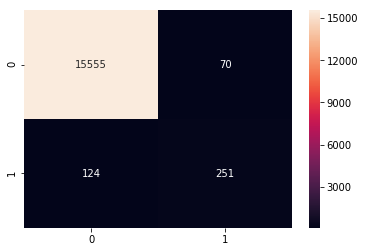

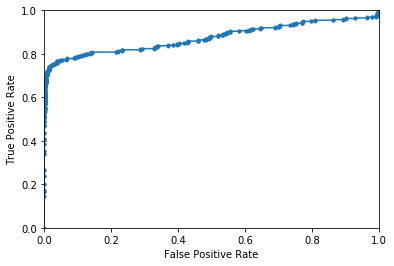

The AUC score for MLP classifier is 0.87389952


In [438]:
c_mat_test,c_mat_imb = data_conf_matrix(l_test_baPCA,
                                        MLP_pr_test,
                                        l_tr_imb,
                                        MLP_pr_tr_imb)

AUC_score,Thres = data_rocauc(l_test_baPCA,
                            MLP_pr_test,
                            prob)

print("The AUC score for MLP classifier is",AUC_score)


In [439]:
cl_rep = data_report(l_test_baPCA,
                     MLP_pr_test)
print(cl_rep)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.78      0.67      0.72       375

   micro avg       0.99      0.99      0.99     16000
   macro avg       0.89      0.83      0.86     16000
weighted avg       0.99      0.99      0.99     16000



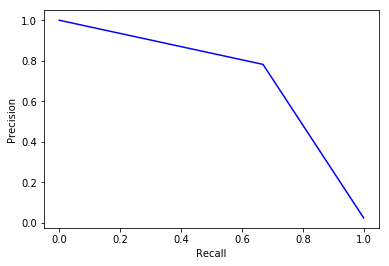

In [440]:
data_prcurve(l_test_baPCA,MLP_pr_test)

In [441]:
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(c_mat_test)
print("Total accuracy = ",Tot_ac)
print("Sensitivity = ",Sens)
print("Specificity = ",Spec)
print("F1 score = ",F1_score)
print("Precision = ",Precision)
print("Recall = ",Recall)
print("FPR = ",FPR )
print("TPR = ",TPR)
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost1 = cost_function(c_mat_imb)
print("Total cost for training data = ",Total_cost1)
print("Total cost for test data = ",Total_cost)


Total accuracy =  16000
Sensitivity =  0.7819314641744548
Specificity =  0.9920913323553798
F1 score =  0.721264367816092
Precision =  0.7819314641744548
Recall =  0.6693333333333333
FPR =  0.00448
TPR =  0.6693333333333333
Total cost for training data =  1020
Total cost for test data =  62700


### MLP Classifier with Dimension Reduction(PCA)

In [ ]:
pk_rd = open("d_tr_bal_aPCA.pickle","rb")
d_tr_bal_aPCA = pickle.load(pk_rd)


pk_rd = open("d_test_aPCA.pickle","rb")
d_test_aPCA = pickle.load(pk_rd)

pk_rd = open("d_tr_imb_aPCA.pickle","rb")
d_tr_imb_aPCA = pickle.load(pk_rd)


pk_rd = open("l_tr_imb.pickle","rb")
l_tr_aPCA_imb = pickle.load(pk_rd)


In [573]:
start = time.time()
MLP_pr_tr_aPCA,MLP_pr_tr_aPCA_imb,MLP_pr_test_aPCA,prob = MLP_classifier(d_tr_bal_aPCA,l_tr_baPCA,d_tr_imb_aPCA,d_test_aPCA,l_test_baPCA)
end = time.time()
print("The execution time for MLP classifier with PCA is ",(end-start),"s")

The execution time for MLP classifier with PCA is  92.24537372589111 s


In [444]:
t_ac = data_acc(l_tr_baPCA,MLP_pr_tr_aPCA)
print("The training accuracy for MLP classifier with PCA is",t_ac)
test_ac = data_acc(l_test_baPCA,MLP_pr_test_aPCA)
print("The testing accuracy for MLP classifier with PCA is",test_ac)

The training accuracy for MLP classifier with PCA is 99.92372622800772
The testing accuracy for MLP classifier with PCA is 98.54375


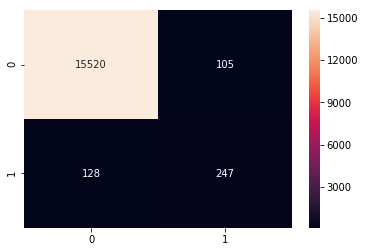

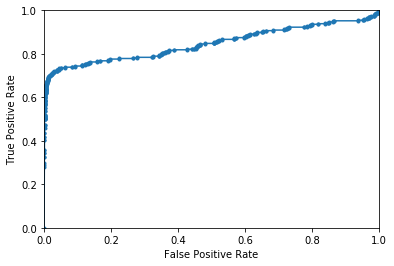

The AUC score for MLP classifier is 0.8476968106666667


In [445]:
c_mat_test,c_mat_imb = data_conf_matrix(l_test_baPCA,
                                        MLP_pr_test_aPCA,
                                        l_tr_aPCA_imb,
                                        MLP_pr_tr_aPCA_imb)

AUC_score,Thres = data_rocauc(l_test_baPCA,
                            MLP_pr_test_aPCA,
                            prob)

print("The AUC score for MLP classifier is",AUC_score)


In [446]:
cl_rep = data_report(l_test_baPCA,
                     MLP_pr_test_aPCA)
print(cl_rep)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15625
           1       0.70      0.66      0.68       375

   micro avg       0.99      0.99      0.99     16000
   macro avg       0.85      0.83      0.84     16000
weighted avg       0.99      0.99      0.99     16000



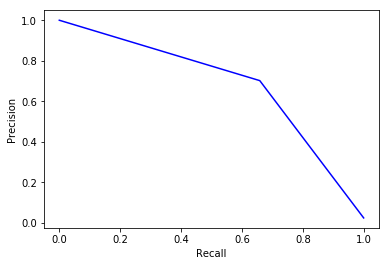

In [447]:
data_prcurve(l_test_baPCA,MLP_pr_test_aPCA)

In [448]:
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(c_mat_test)
print("Total accuracy = ",Tot_ac)
print("Sensitivity = ",Sens)
print("Specificity = ",Spec)
print("F1 score = ",F1_score)
print("Precision = ",Precision)
print("Recall = ",Recall)
print("FPR = ",FPR )
print("TPR = ",TPR)
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost1 = cost_function(c_mat_imb)
print("Total cost for training data = ",Total_cost1)
print("Total cost for test data = ",Total_cost)


Total accuracy =  16000
Sensitivity =  0.7017045454545454
Specificity =  0.9918200408997955
F1 score =  0.6795048143053646
Precision =  0.7017045454545454
Recall =  0.6586666666666666
FPR =  0.00672
TPR =  0.6586666666666666
Total cost for training data =  570
Total cost for test data =  65050


### MLP classifier with Average Cost using Stratified K-fold Cross Validation

In [47]:
#function to find Gaussian Classifier with cross validation
def MLP_classifier1(d_tr,l_tr,d_test,l_test):
    model = MLPClassifier(solver='adam', activation = 'relu', alpha=1e-5, hidden_layer_sizes=(100,50),learning_rate = 'constant',
                      learning_rate_init = 0.0001)
    model.fit(d_tr,l_tr)
    MLP_pr_tr = model.predict(d_tr)
    MLP_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return MLP_pr_tr,MLP_pr_test,prob;

In [48]:
from sklearn.model_selection import StratifiedKFold
tr_acs = [];
test_acs = [];
tr_cost = [];
test_cost = [];
Tot_accs = [];
Senss = [];
Specs = [];
Precisions = [];
Recalls = [];
F1_scores = [];
FPRs = [];
TPRs = [];

obj = StratifiedKFold(n_splits = 5,random_state = None, shuffle = True)
#obj.get_n_splits(data_train_after_PCA,label_train_beforeafter_PCA)
for id_tr,id_test in obj.split(d_tr_bal_aPCA,l_tr_baPCA):
    d_tr, d_test = d_tr_bal_aPCA[id_tr], d_tr_bal_aPCA[id_test]
    l_tr, l_test = l_tr_baPCA[id_tr], l_tr_baPCA[id_test]
    tr_pr,test_pr,probs = MLP_classifier1(d_tr, l_tr, d_test, l_test)
    tr_ac = data_acc(l_tr,tr_pr)
    tr_acs.append(tr_ac)
    
    test_ac = data_acc(l_test,test_pr)
    test_acs.append(test_ac)
    
    x = confusion_matrix(l_test,test_pr)
    Tot_acc,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(x)
    
    x1 = confusion_matrix(l_tr,tr_pr)
    Tot_ac_tr,Sens_tr,Spec_tr,Precision_tr,Recall_tr,F1_score_tr,FPR_tr,TPR_tr,Total_cost1 = cost_function(x1)
    
    Tot_accs.append(Tot_acc)
    Senss.append(Sens)
    Specs.append(Spec)
    Precisions.append(Precision)
    Recalls.append(Recall)
    F1_scores.append(F1_score)
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    tr_cost.append(Total_cost1)
    test_cost.append(Total_cost)
    
    
    
    

In [49]:
print("The training accuracy for MLP with cross validation is ",np.mean(tr_acs))
print("The testing accuracy for MLP with cross validation is ",np.mean(test_acs))
print("Sensitivity is ",np.mean(Senss))
print("Specificity is ",np.mean(Specs))
print("Precision is ",np.mean(Precisions))
print("Recall is ",np.mean(Recalls))
print("F1 score is ",np.mean(F1_scores))
print("FPR is ",np.mean(FPRs))
print("TPR is ",np.mean(TPRs))
print("Training data cost is ",np.mean(tr_cost))
print("Testing data cost is ",np.mean(test_cost))

The training accuracy for MLP with cross validation is  99.92245493378095
The testing accuracy for MLP with cross validation is  99.63642860826832
Sensitivity is  0.9941291101622836
Specificity is  0.9986212096828229
Precision is  0.9941291101622836
Recall is  0.9986270539932274
F1 score is  0.9963726524630105
FPR is  0.00589848182786121
TPR is  0.9986270539932274
Training data cost is  9750.0
Testing data cost is  2932.0


### Multi-layer Perceptron classifier for best Model Selection

In [454]:
#Model - 1 -increase in the number of hidden layers
def MLP_classifier2(d_tr,l_tr,d_test,l_test,i):
    model = MLPClassifier(solver='adam', activation = 'relu', alpha=1e-5, hidden_layer_sizes=(200,100),learning_rate = 'constant',
                      learning_rate_init = 0.0001)
    model.fit(d_tr,l_tr)
    MLP_pr_tr = model.predict(d_tr)
    MLP_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return MLP_pr_tr,MLP_pr_test,prob;

In [455]:
from sklearn.model_selection import StratifiedKFold
tr_acs, tr_acc1 = [],[];
test_acs, test_acc1 = [],[];
tr_cost,tr_cost1 = [],[];
test_cost,test_cost1 = [],[];
Tot_accs,Tot_acc1 = [],[];
Senss,Sens1 = [],[];
Specs,Spec1 = [],[];
Precisions,Precision1 = [],[];
Recalls,Recall1 = [],[];
F1_scores,F1_score1  = [],[];
FPRs,FPR1 = [],[];
TPRs,TPR1 = [],[];
obj = StratifiedKFold(n_splits = 3,random_state = None, shuffle = True)
for id_tr,id_test in obj.split(d_tr_bal_aPCA,l_tr_baPCA):
    d_tr, d_test = d_tr_bal_aPCA[id_tr], d_tr_bal_aPCA[id_test]
    l_tr, l_test = l_tr_baPCA[id_tr], l_tr_baPCA[id_test]
    tr_pr,test_pr,probs = MLP_classifier2(d_tr, l_tr, d_test, l_test,i)
    tr_ac = data_acc(l_tr,tr_pr)
    tr_acs.append(tr_ac)

    test_ac = data_acc(l_test,test_pr)
    test_acs.append(test_ac)

    x = confusion_matrix(l_test,test_pr)
    Tot_acc,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(x)

    x1 = confusion_matrix(l_tr,tr_pr)
    Tot_ac_tr,Sens_tr,Spec_tr,Precision_tr,Recall_tr,F1_score_tr,FPR_tr,TPR_tr,Total_cost1 = cost_function(x1)

    Tot_accs.append(Tot_acc)
    Senss.append(Sens)
    Specs.append(Spec)
    Precisions.append(Precision)
    Recalls.append(Recall)
    F1_scores.append(F1_score)
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    tr_cost.append(Total_cost1)
    test_cost.append(Total_cost)
tr_acc1.append(np.mean(tr_acs))
test_acc1.append(np.mean(test_acs))
Tot_acc1.append(np.mean(Tot_accs))
Sens1.append(np.mean(Senss))
Spec1.append(np.mean(Specs))
Precision1.append(np.mean(Precisions))
Recall1.append(np.mean(Recalls))
F1_score1.append(np.mean(F1_scores))
FPR1.append(np.mean(FPRs))
TPR1.append(np.mean(TPRs))
tr_cost1.append(np.mean(tr_cost))
test_cost1.append(np.mean(test_cost))

In [456]:
print("**************************Metrics when Number of Layers is increased = [200,100]*****************************")

print("Sensitivity is ",Sens1)
print("Specificity is ",Spec1)
print("Precision is ",Precision1)
print("Recall is ",Recall1)
print("F1 score is ",F1_score1)
print("FPR is ",FPR1)
print("TPR is ",TPR1)
print("Training data cost is ",tr_cost1)
print("Testing data cost is ",test_cost1)

**************************Metrics when Number of Layers is increased = [200,100]*****************************
Sensitivity is  [0.9935250113230586]
Specificity is  [0.9986200387706932]
Precision is  [0.9935250113230586]
Recall is  [0.9986270643405164]
F1 score is  [0.9960693614778476]
FPR is  [0.00650875471034272]
TPR is  [0.9986270643405164]
Training data cost is  [8876.666666666666]
Testing data cost is  [4926.666666666667]


In [457]:
#Model - 2 -- change in solver
def MLP_classifier3(d_tr,l_tr,d_test,l_test,i):
    model = MLPClassifier(solver='lbfgs', activation = 'relu', alpha=1e-5, hidden_layer_sizes=(100,50),learning_rate = 'constant',
                      learning_rate_init = 0.0001)
    model.fit(d_tr,l_tr)
    MLP_pr_tr = model.predict(d_tr)
    MLP_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return MLP_pr_tr,MLP_pr_test,prob;

In [459]:
from sklearn.model_selection import StratifiedKFold
tr_acs, tr_acc2 = [],[];
test_acs, test_acc2 = [],[];
tr_cost,tr_cost2 = [],[];
test_cost,test_cost2 = [],[];
Tot_accs,Tot_acc2 = [],[];
Senss,Sens2 = [],[];
Specs,Spec2 = [],[];
Precisions,Precision2 = [],[];
Recalls,Recall2 = [],[];
F1_scores,F1_score2  = [],[];
FPRs,FPR2 = [],[];
TPRs,TPR2 = [],[];
obj = StratifiedKFold(n_splits = 3,random_state = None, shuffle = True)
for id_tr,id_test in obj.split(d_tr_bal_aPCA,l_tr_baPCA):
    d_tr, d_test = d_tr_bal_aPCA[id_tr], d_tr_bal_aPCA[id_test]
    l_tr, l_test = l_tr_baPCA[id_tr], l_tr_baPCA[id_test]
    tr_pr,test_pr,probs = MLP_classifier3(d_tr, l_tr, d_test, l_test,i)
    tr_ac = data_acc(l_tr,tr_pr)
    tr_acs.append(tr_ac)

    test_ac = data_acc(l_test,test_pr)
    test_acs.append(test_ac)

    x = confusion_matrix(l_test,test_pr)
    Tot_acc,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(x)

    x1 = confusion_matrix(l_tr,tr_pr)
    Tot_ac_tr,Sens_tr,Spec_tr,Precision_tr,Recall_tr,F1_score_tr,FPR_tr,TPR_tr,Total_cost1 = cost_function(x1)

    Tot_accs.append(Tot_acc)
    Senss.append(Sens)
    Specs.append(Spec)
    Precisions.append(Precision)
    Recalls.append(Recall)
    F1_scores.append(F1_score)
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    tr_cost.append(Total_cost1)
    test_cost.append(Total_cost)
tr_acc2.append(np.mean(tr_acs))
test_acc2.append(np.mean(test_acs))
Tot_acc2.append(np.mean(Tot_accs))
Sens2.append(np.mean(Senss))
Spec2.append(np.mean(Specs))
Precision2.append(np.mean(Precisions))
Recall2.append(np.mean(Recalls))
F1_score2.append(np.mean(F1_scores))
FPR2.append(np.mean(FPRs))
TPR2.append(np.mean(TPRs))
tr_cost2.append(np.mean(tr_cost))
test_cost2.append(np.mean(test_cost))

In [460]:
print("**************************Metrics when the solver is changed = lgbfs*****************************")

print("Sensitivity is ",Sens2)
print("Specificity is ",Spec2)
print("Precision is ",Precision2)
print("Recall is ",Recall2)
print("F1 score is ",F1_score2)
print("FPR is ",FPR2)
print("TPR is ",TPR2)
print("Training data cost is ",tr_cost2)
print("Testing data cost is ",test_cost2)

**************************Metrics when the solver is changed = lgbfs*****************************
Sensitivity is  [0.9919184548756362]
Specificity is  [0.9982604508545956]
Precision is  [0.9919184548756362]
Recall is  [0.9982711407534408]
F1 score is  [0.99508389379779]
FPR is  [0.00813594144879756]
TPR is  [0.9982711407534408]
Training data cost is  [7593.333333333333]
Testing data cost is  [6200.0]


In [461]:
#Model - 3 -- increase in activation
def MLP_classifier3(d_tr,l_tr,d_test,l_test,i):
    model = MLPClassifier(solver='adam', activation = 'tanh', alpha=1e-5, hidden_layer_sizes=(100,10),learning_rate = 'constant',
                      learning_rate_init = 0.0001)
    model.fit(d_tr,l_tr)
    MLP_pr_tr = model.predict(d_tr)
    MLP_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return MLP_pr_tr,MLP_pr_test,prob;

In [463]:
from sklearn.model_selection import StratifiedKFold
tr_acs, tr_acc3 = [],[];
test_acs, test_acc3 = [],[];
tr_cost,tr_cost3 = [],[];
test_cost,test_cost3 = [],[];
Tot_accs,Tot_acc3 = [],[];
Senss,Sens3 = [],[];
Specs,Spec3 = [],[];
Precisions,Precision3 = [],[];
Recalls,Recall3 = [],[];
F1_scores,F1_score3  = [],[];
FPRs,FPR3 = [],[];
TPRs,TPR3 = [],[];
obj = StratifiedKFold(n_splits = 3,random_state = None, shuffle = True)
for id_tr,id_test in obj.split(d_tr_bal_aPCA,l_tr_baPCA):
    d_tr, d_test = d_tr_bal_aPCA[id_tr], d_tr_bal_aPCA[id_test]
    l_tr, l_test = l_tr_baPCA[id_tr], l_tr_baPCA[id_test]
    tr_pr,test_pr,probs = MLP_classifier3(d_tr, l_tr, d_test, l_test,i)
    tr_ac = data_acc(l_tr,tr_pr)
    tr_acs.append(tr_ac)

    test_ac = data_acc(l_test,test_pr)
    test_acs.append(test_ac)

    x = confusion_matrix(l_test,test_pr)
    Tot_acc,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(x)

    x1 = confusion_matrix(l_tr,tr_pr)
    Tot_ac_tr,Sens_tr,Spec_tr,Precision_tr,Recall_tr,F1_score_tr,FPR_tr,TPR_tr,Total_cost1 = cost_function(x1)

    Tot_accs.append(Tot_acc)
    Senss.append(Sens)
    Specs.append(Spec)
    Precisions.append(Precision)
    Recalls.append(Recall)
    F1_scores.append(F1_score)
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    tr_cost.append(Total_cost1)
    test_cost.append(Total_cost)
tr_acc3.append(np.mean(tr_acs))
test_acc3.append(np.mean(test_acs))
Tot_acc3.append(np.mean(Tot_accs))
Sens3.append(np.mean(Senss))
Spec3.append(np.mean(Specs))
Precision3.append(np.mean(Precisions))
Recall3.append(np.mean(Recalls))
F1_score3.append(np.mean(F1_scores))
FPR3.append(np.mean(FPRs))
TPR3.append(np.mean(TPRs))
tr_cost3.append(np.mean(tr_cost))
test_cost3.append(np.mean(test_cost))

In [464]:
print("**************************Metrics when the activation is changed to tanh*****************************")

print("Sensitivity is ",Sens3)
print("Specificity is ",Spec3)
print("Precision is ",Precision3)
print("Recall is ",Recall3)
print("F1 score is ",F1_score3)
print("FPR is ",FPR3)
print("TPR is ",TPR3)
print("Training data cost is ",tr_cost3)
print("Testing data cost is ",test_cost3)

**************************Metrics when the activation is changed to tanh*****************************
Sensitivity is  [0.9903645139749063]
Specificity is  [0.99810379117639]
Precision is  [0.9903645139749063]
Recall is  [0.998118585452144]
F1 score is  [0.994226092224765]
FPR is  [0.009712245394060084]
TPR is  [0.998118585452144]
Training data cost is  [11403.333333333334]
Testing data cost is  [6803.333333333333]


In [465]:
#Comparison and Best model selection
F1_scores = np.array([F1_score1,F1_score2,F1_score3])
Test_costs = np.array([test_cost1,test_cost2,test_cost3])
bestf1 = np.argmax(F1_scores)
besttc = np.argmin(Test_costs)

if (bestf1 == 0 and besttc == 0):
    print("The best model for MLP is when the Hidden Layers was increased to [200,100]")
    
elif (bestf1 == 1 and besttc == 1):
    print("The best model for MLP is when the Solver is changed to lgbfs")

elif (bestf1 == 2 and besttc == 2):
    print("The best model for MLP is when the activation is changed to tanh")



The best model for MLP is when the Hidden Layers was increased to [200,100]


### 

### Random Forest classifier

### Random Forest without Dimension Reduction(PCA)

In [476]:
def RF_classifier(d_tr,l_tr,d_tr_imb,d_test,l_test):
    model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    model.fit(d_tr,l_tr)
    RF_pr_tr = model.predict(d_tr)
    RF_pr_tr_imb = model.predict(d_tr_imb)
    RF_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return RF_pr_tr,RF_pr_tr_imb,RF_pr_test,prob;

### Random Forest Classifier without Dimension Reduction(PCA)

In [574]:
start = time.time()
RF_pr_tr, RF_pr_tr_imb, RF_pr_test,prob = RF_classifier(d_tr_bal_bPCA, l_tr_baPCA, d_tr_imb, d_test_bPCA, l_test_baPCA)
end = time.time()
print("The execution time for RF classifier without PCA is ",(end-start),"s")

The execution time for RF classifier without PCA is  15.249398708343506 s


In [478]:
t_ac = data_acc(l_tr_baPCA,RF_pr_tr)
print("The training accuracy for RF classifier without PCA is",t_ac)
test_ac = data_acc(l_test_baPCA,RF_pr_test)
print("The testing accuracy for RF classifier without PCA is",test_ac)

The training accuracy for RF classifier without PCA is 94.26166988711482
The testing accuracy for RF classifier without PCA is 93.56875


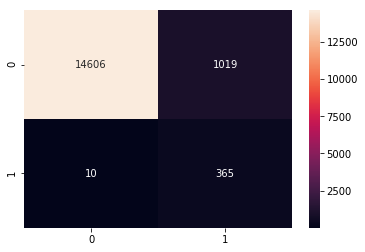

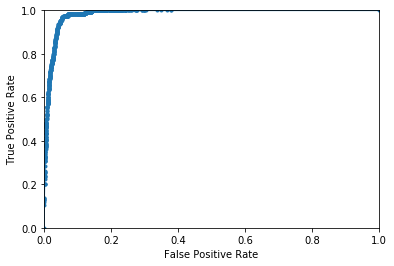

The AUC score for RF classifier is 0.9846296746666666


In [479]:
c_mat_test,c_mat_imb = data_conf_matrix(l_test_baPCA,
                                        RF_pr_test,
                                        l_tr_imb,
                                        RF_pr_tr_imb)

AUC_score,Thres = data_rocauc(l_test_baPCA,
                            RF_pr_test,
                            prob)

print("The AUC score for RF classifier is",AUC_score)


In [480]:
cl_rep = data_report(l_test_baPCA,
                     RF_pr_test)
print(cl_rep)


              precision    recall  f1-score   support

           0       1.00      0.93      0.97     15625
           1       0.26      0.97      0.42       375

   micro avg       0.94      0.94      0.94     16000
   macro avg       0.63      0.95      0.69     16000
weighted avg       0.98      0.94      0.95     16000



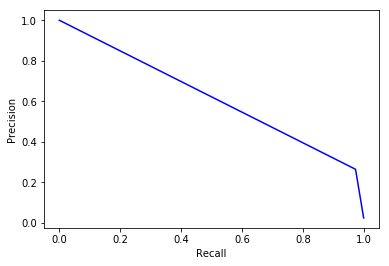

In [481]:
data_prcurve(l_test_baPCA,RF_pr_test)

In [482]:
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(c_mat_test)
print("Total accuracy = ",Tot_ac)
print("Sensitivity = ",Sens)
print("Specificity = ",Spec)
print("F1 score = ",F1_score)
print("Precision = ",Precision)
print("Recall = ",Recall)
print("FPR = ",FPR )
print("TPR = ",TPR)
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost1 = cost_function(c_mat_imb)
print("Total cost for training data = ",Total_cost1)
print("Total cost for test data = ",Total_cost)


Total accuracy =  16000
Sensitivity =  0.26372832369942195
Specificity =  0.9993158182813355
F1 score =  0.4150085275724844
Precision =  0.26372832369942195
Recall =  0.9733333333333334
FPR =  0.065216
TPR =  0.9733333333333334
Total cost for training data =  20410
Total cost for test data =  15190


### Random Forest Classifier with Dimension Reduction(PCA)

In [483]:
pk_rd = open("d_tr_bal_aPCA.pickle","rb")
d_tr_bal_aPCA = pickle.load(pk_rd)


pk_rd = open("d_test_aPCA.pickle","rb")
d_test_aPCA = pickle.load(pk_rd)

pk_rd = open("d_tr_imb_aPCA.pickle","rb")
d_tr_imb_aPCA = pickle.load(pk_rd)

pk_rd = open("l_tr_imb.pickle","rb")
l_tr_aPCA_imb = pickle.load(pk_rd)


In [575]:
start = time.time()
RF_pr_tr_aPCA,RF_pr_tr_aPCA_imb,RF_pr_test_aPCA,prob = RF_classifier(d_tr_bal_aPCA,l_tr_baPCA,d_tr_imb_aPCA,d_test_aPCA,l_test_baPCA)
end = time.time()
print("The execution time for RF classifier with PCA is ",(end-start),"s")

The execution time for RF classifier with PCA is  19.697731018066406 s


In [485]:
t_ac = data_acc(l_tr_baPCA,RF_pr_tr_aPCA)
print("The training accuracy for RF classifier with PCA is",t_ac)
test_ac = data_acc(l_test_baPCA,RF_pr_test_aPCA)
print("The testing accuracy for RF classifier with PCA is",test_ac)

The training accuracy for RF classifier with PCA is 94.15234414725923
The testing accuracy for RF classifier with PCA is 93.46875


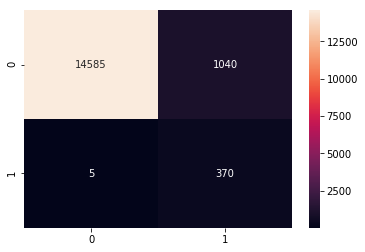

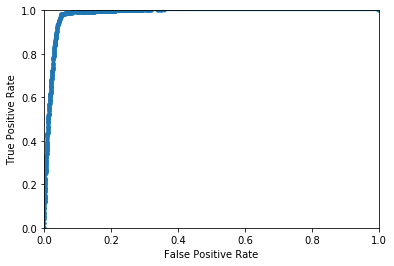

The AUC score for RF's classifier is 0.9825193813333333


In [486]:
c_mat_test,c_mat_imb = data_conf_matrix(l_test_baPCA,
                                        RF_pr_test_aPCA,
                                        l_tr_aPCA_imb,
                                        RF_pr_tr_aPCA_imb)

AUC_score,Thres = data_rocauc(l_test_baPCA,
                            RF_pr_test_aPCA,
                            prob)

print("The AUC score for RF's classifier is",AUC_score)


In [487]:
cl_rep = data_report(l_test_baPCA,
                     RF_pr_test_aPCA)
print(cl_rep)


              precision    recall  f1-score   support

           0       1.00      0.93      0.97     15625
           1       0.26      0.99      0.41       375

   micro avg       0.93      0.93      0.93     16000
   macro avg       0.63      0.96      0.69     16000
weighted avg       0.98      0.93      0.95     16000



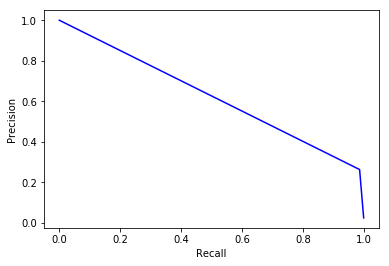

In [488]:
data_prcurve(l_test_baPCA,RF_pr_test_aPCA)

In [489]:
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(c_mat_test)
print("Total accuracy = ",Tot_ac)
print("Sensitivity = ",Sens)
print("Specificity = ",Spec)
print("F1 score = ",F1_score)
print("Precision = ",Precision)
print("Recall = ",Recall)
print("FPR = ",FPR )
print("TPR = ",TPR)
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost1 = cost_function(c_mat_imb)
print("Total cost for training data = ",Total_cost1)
print("Total cost for test data = ",Total_cost)


Total accuracy =  16000
Sensitivity =  0.2624113475177305
Specificity =  0.9996572995202193
F1 score =  0.41456582633053224
Precision =  0.2624113475177305
Recall =  0.9866666666666667
FPR =  0.06656
TPR =  0.9866666666666667
Total cost for training data =  19160
Total cost for test data =  12900


### Random Forest classifier with Average Cost using Stratified K-fold Cross Validation

In [490]:
#function to find Gaussian Classifier with cross validation
def RF_classifier1(d_tr,l_tr,d_test,l_test):
    model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    model.fit(d_tr,l_tr)
    RF_pr_tr = model.predict(d_tr)
    RF_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return RF_pr_tr,RF_pr_test,prob;

In [491]:
from sklearn.model_selection import StratifiedKFold
tr_acs = [];
test_acs = [];
tr_cost = [];
test_cost = [];
Tot_accs = [];
Senss = [];
Specs = [];
Precisions = [];
Recalls = [];
F1_scores = [];
FPRs = [];
TPRs = [];

obj = StratifiedKFold(n_splits = 5,random_state = None, shuffle = True)
#obj.get_n_splits(data_train_after_PCA,label_train_beforeafter_PCA)
for id_tr,id_test in obj.split(d_tr_bal_aPCA,l_tr_baPCA):
    d_tr, d_test = d_tr_bal_aPCA[id_tr], d_tr_bal_aPCA[id_test]
    l_tr, l_test = l_tr_baPCA[id_tr], l_tr_baPCA[id_test]
    tr_pr,test_pr,probs = RF_classifier1(d_tr, l_tr, d_test, l_test)
    tr_ac = data_acc(l_tr,tr_pr)
    tr_acs.append(tr_ac)
    
    test_ac = data_acc(l_test,test_pr)
    test_acs.append(test_ac)
    
    x = confusion_matrix(l_test,test_pr)
    Tot_acc,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(x)
    
    x1 = confusion_matrix(l_tr,tr_pr)
    Tot_ac_tr,Sens_tr,Spec_tr,Precision_tr,Recall_tr,F1_score_tr,FPR_tr,TPR_tr,Total_cost1 = cost_function(x1)
    
    Tot_accs.append(Tot_acc)
    Senss.append(Sens)
    Specs.append(Spec)
    Precisions.append(Precision)
    Recalls.append(Recall)
    F1_scores.append(F1_score)
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    tr_cost.append(Total_cost1)
    test_cost.append(Total_cost)
    
    
    
    

In [492]:
print("The training accuracy for RF with cross validation is ",np.mean(tr_acs))
print("The testing accuracy for RF with cross validation is ",np.mean(test_acs))
print("Sensitivity is ",np.mean(Senss))
print("Specificity is ",np.mean(Specs))
print("Precision is ",np.mean(Precisions))
print("Recall is ",np.mean(Recalls))
print("F1 score is ",np.mean(F1_scores))
print("FPR is ",np.mean(FPRs))
print("TPR is ",np.mean(TPRs))
print("Training data cost is ",np.mean(tr_cost))
print("Testing data cost is ",np.mean(test_cost))

The training accuracy for RF with cross validation is  94.2406935941205
The testing accuracy for RF with cross validation is  94.18792869015594
Sensitivity is  0.9305476734804173
Specificity is  0.9538471216588956
Precision is  0.9305476734804173
Recall is  0.9550491836378299
F1 score is  0.9426335418863829
FPR is  0.07129060983471107
TPR is  0.9550491836378299
Training data cost is  362200.0
Testing data cost is  91204.0


### Random Forest Model Selection

In [493]:
def RF_classifier3(d_tr,l_tr,d_test,l_test,i):
    model = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0)
    model.fit(d_tr,l_tr)
    SVM_pr_tr = model.predict(d_tr)
    SVM_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return SVM_pr_tr,SVM_pr_test,prob;

In [494]:
from sklearn.model_selection import StratifiedKFold
tr_acs, tr_acc1, tr_acc25, tr_acc500 = [],[],[],[];
test_acs, test_acc1, test_acc25, test_acc500 = [],[],[],[];
tr_cost,tr_cost1,tr_cost25,tr_cost500 = [],[],[],[];
test_cost,test_cost1,test_cost25,test_cost500 = [],[],[],[];
Tot_accs,Tot_acc1,Tot_acc25,Tot_acc500 = [],[],[],[];
Senss,Sens1,Sens25,Sens500 = [],[],[],[];
Specs,Spec1,Spec25,Spec500 = [],[],[],[];
Precisions,Precision1,Precision25,Precision500 = [],[],[],[];
Recalls,Recall1,Recall25,Recall500 = [],[],[],[];
F1_scores,F1_score1,F1_score25,F1_score500  = [],[],[],[];
FPRs,FPR1,FPR25,FPR500 = [],[],[],[];
TPRs,TPR1,TPR25,TPR500 = [],[],[],[];

Cvalues = [1, 25, 500]
for i in Cvalues:
    obj = StratifiedKFold(n_splits = 3,random_state = None, shuffle = True)
    #obj.get_n_splits(data_train_after_PCA,label_train_beforeafter_PCA)
    for id_tr,id_test in obj.split(d_tr_bal_aPCA,l_tr_baPCA):
        d_tr, d_test = d_tr_bal_aPCA[id_tr], d_tr_bal_aPCA[id_test]
        l_tr, l_test = l_tr_baPCA[id_tr], l_tr_baPCA[id_test]
        tr_pr,test_pr,probs = RF_classifier3(d_tr, l_tr, d_test, l_test,i)
        tr_ac = data_acc(l_tr,tr_pr)
        tr_acs.append(tr_ac)

        test_ac = data_acc(l_test,test_pr)
        test_acs.append(test_ac)

        x = confusion_matrix(l_test,test_pr)
        Tot_acc,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(x)

        x1 = confusion_matrix(l_tr,tr_pr)
        Tot_ac_tr,Sens_tr,Spec_tr,Precision_tr,Recall_tr,F1_score_tr,FPR_tr,TPR_tr,Total_cost1 = cost_function(x1)

        Tot_accs.append(Tot_acc)
        Senss.append(Sens)
        Specs.append(Spec)
        Precisions.append(Precision)
        Recalls.append(Recall)
        F1_scores.append(F1_score)
        FPRs.append(FPR)
        TPRs.append(TPR)

        tr_cost.append(Total_cost1)
        test_cost.append(Total_cost)
    
    if(i == 1):
        tr_acc1.append(np.mean(tr_acs))
        test_acc1.append(np.mean(test_acs))
        Tot_acc1.append(np.mean(Tot_accs))
        Sens1.append(np.mean(Senss))
        Spec1.append(np.mean(Specs))
        Precision1.append(np.mean(Precisions))
        Recall1.append(np.mean(Recalls))
        F1_score1.append(np.mean(F1_scores))
        FPR1.append(np.mean(FPRs))
        TPR1.append(np.mean(TPRs))
        tr_cost1.append(np.mean(tr_cost))
        test_cost1.append(np.mean(test_cost))
    
    elif(i == 25):
        tr_acc25.append(np.mean(tr_acs))
        test_acc25.append(np.mean(test_acs))
        Tot_acc25.append(np.mean(Tot_accs))
        Sens25.append(np.mean(Senss))
        Spec25.append(np.mean(Specs))
        Precision25.append(np.mean(Precisions))
        Recall25.append(np.mean(Recalls))
        F1_score25.append(np.mean(F1_scores))
        FPR25.append(np.mean(FPRs))
        TPR25.append(np.mean(TPRs))
        tr_cost25.append(np.mean(tr_cost))
        test_cost25.append(np.mean(test_cost))
        
    elif(i == 500):
        tr_acc500.append(np.mean(tr_acs))
        test_acc500.append(np.mean(test_acs))
        Tot_acc500.append(np.mean(Tot_accs))
        Sens500.append(np.mean(Senss))
        Spec500.append(np.mean(Specs))
        Precision500.append(np.mean(Precisions))
        Recall500.append(np.mean(Recalls))
        F1_score500.append(np.mean(F1_scores))
        FPR500.append(np.mean(FPRs))
        TPR500.append(np.mean(TPRs))
        tr_cost500.append(np.mean(tr_cost))
        test_cost500.append(np.mean(test_cost))
        


In [495]:
print("**************************Metrics when number of estimators = 1*****************************")

print("Sensitivity is ",Sens1)
print("Specificity is ",Spec1)
print("Precision is ",Precision1)
print("Recall is ",Recall1)
print("F1 score is ",F1_score1)
print("FPR is ",FPR1)
print("TPR is ",TPR1)
print("Training data cost is ",tr_cost1)
print("Testing data cost is ",test_cost1)
print("                                                                         ")
print("**************************Metrics when number of estimators = 25*****************************")

print("Sensitivity is ",Sens25)
print("Specificity is ",Spec25)
print("Precision is ",Precision25)
print("Recall is ",Recall25)
print("F1 score is ",F1_score25)
print("FPR is ",FPR25)
print("TPR is ",TPR25)
print("Training data cost is ",tr_cost25)
print("Testing data cost is ",test_cost25)
print("                                                                         ")
print("**************************Metrics when number of estimators = 500*****************************")

print("Sensitivity is ",Sens500)
print("Specificity is ",Spec500)
print("Precision is ",Precision500)
print("Recall is ",Recall500)
print("F1 score is ",F1_score500)
print("FPR is ",FPR500)
print("TPR is ",TPR500)
print("Training data cost is ",tr_cost500)
print("Testing data cost is ",test_cost500)

**************************Metrics when number of estimators = 1*****************************
Sensitivity is  [0.9094017724181693]
Specificity is  [0.7486728150122004]
Precision is  [0.9094017724181693]
Recall is  [0.6872263168909001]
F1 score is  [0.7828118471142157]
FPR is  [0.06849380106410193]
TPR is  [0.6872263168909001]
Training data cost is  [2057026.6666666667]
Testing data cost is  [1029656.6666666666]
                                                                         
**************************Metrics when number of estimators = 25*****************************
Sensitivity is  [0.918698265018263]
Specificity is  [0.8513875698693588]
Precision is  [0.918698265018263]
Recall is  [0.8213412246650619]
F1 score is  [0.8621677495847596]
FPR is  [0.07131595003371761]
TPR is  [0.8213412246650619]
Training data cost is  [1177626.6666666667]
Testing data cost is  [590258.3333333334]
                                                                         
**************************

In [496]:
#Comparison and Best model selection
F1_scores = np.array([F1_score1,F1_score25,F1_score500])
Test_costs = np.array([test_cost1,test_cost25,test_cost500])
bestf1 = np.argmax(F1_scores)
besttc = np.argmin(Test_costs)

if (bestf1 == 0 and besttc == 0):
    print("The best model for RF is with number of estimators = 1")
    
elif (bestf1 == 1 and besttc == 1):
    print("The best model for RF is with number of estimators = 25")

elif (bestf1 == 2 and besttc == 2):
    print("The best model for RF is with number of estimators = 500")



The best model for RF is with number of estimators = 500


### KNN classifier

In [540]:
#function to find KNN Classifier
def KNN_classifier(d_tr,l_tr,d_tr_imb,d_test,l_test):
    model =  KNeighborsClassifier(n_neighbors=5)
    model.fit(d_tr,l_tr)
    KNN_pr_tr = model.predict(d_tr)
    KNN_pr_tr_imb = model.predict(d_tr_imb)
    KNN_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return KNN_pr_tr,KNN_pr_tr_imb,KNN_pr_test,prob;

### KNN Classifier without Dimension Reduction(PCA)

In [617]:
start = time.time()
KNN_pr_tr, KNN_pr_tr_imb, KNN_pr_test,prob = KNN_classifier(d_tr_bal_bPCA, l_tr_baPCA, d_tr_imb, d_test_bPCA, l_test_baPCA)
end = time.time()
print("The execution time for KNN classifier without PCA is ",(end-start),"s")

The execution time for KNN classifier without PCA is  586.5105175971985 s


In [542]:
t_ac = data_acc(l_tr_baPCA,KNN_pr_tr)
print("The training accuracy for KNN classifier without PCA is",t_ac)
test_ac = data_acc(l_test_baPCA,KNN_pr_test)
print("The testing accuracy for KNN classifier without PCA is",test_ac)

The training accuracy for KNN classifier without PCA is 99.19912539408115
The testing accuracy for KNN classifier without PCA is 97.775


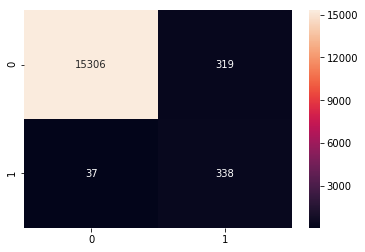

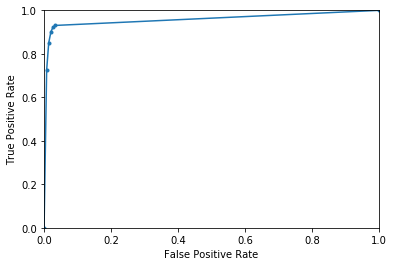

The AUC score for KNN classifier is 0.9584372906666668


In [543]:
KNNc_mat_test,c_mat_imb = data_conf_matrix(l_test_baPCA,
                                        KNN_pr_test,
                                        l_tr_imb,
                                        KNN_pr_tr_imb)

AUC_score,Thres = data_rocauc(l_test_baPCA,
                            KNN_pr_test,
                            prob)

print("The AUC score for KNN classifier is",AUC_score)


In [544]:
cl_rep = data_report(l_test_baPCA,
                     KNN_pr_test)
print(cl_rep)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.51      0.90      0.66       375

   micro avg       0.98      0.98      0.98     16000
   macro avg       0.76      0.94      0.82     16000
weighted avg       0.99      0.98      0.98     16000



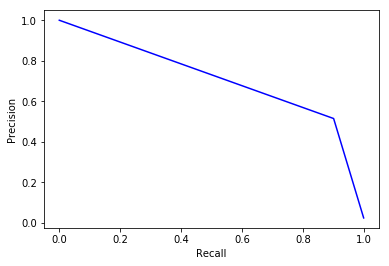

In [545]:
data_prcurve(l_test_baPCA,KNN_pr_test)

In [546]:
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(c_mat_test)
print("Total accuracy = ",Tot_ac)
print("Sensitivity = ",Sens)
print("Specificity = ",Spec)
print("F1 score = ",F1_score)
print("Precision = ",Precision)
print("Recall = ",Recall)
print("FPR = ",FPR )
print("TPR = ",TPR)
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost1 = cost_function(c_mat_imb)
print("Total cost for training data = ",Total_cost1)
print("Total cost for test data = ",Total_cost)


Total accuracy =  16000
Sensitivity =  0.2624113475177305
Specificity =  0.9996572995202193
F1 score =  0.41456582633053224
Precision =  0.2624113475177305
Recall =  0.9866666666666667
FPR =  0.06656
TPR =  0.9866666666666667
Total cost for training data =  3580
Total cost for test data =  12900


### KNN Classifier with Dimension Reduction(PCA)

In [547]:
pk_rd = open("d_tr_bal_aPCA.pickle","rb")
d_tr_bal_aPCA = pickle.load(pk_rd)


pk_rd = open("d_test_aPCA.pickle","rb")
d_test_aPCA = pickle.load(pk_rd)

pk_rd = open("d_tr_imb_aPCA.pickle","rb")
d_tr_imb_aPCA = pickle.load(pk_rd)

pk_rd = open("l_tr_imb.pickle","rb")
l_tr_aPCA_imb = pickle.load(pk_rd)


In [576]:
start = time.time()
KNN_pr_tr_aPCA,KNN_pr_tr_aPCA_imb,KNN_pr_test_aPCA,prob = KNN_classifier(d_tr_bal_aPCA,l_tr_baPCA,d_tr_imb_aPCA,d_test_aPCA,l_test_baPCA)
end = time.time()
print("The execution time for KNN classifier with PCA is ",(end-start),"s")

The execution time for KNN classifier with PCA is  263.18514490127563 s


In [549]:
t_ac = data_acc(l_tr_baPCA,KNN_pr_tr_aPCA)
print("The training accuracy for KNN classifier with PCA is",t_ac)
test_ac = data_acc(l_test_baPCA,KNN_pr_test_aPCA)
print("The testing accuracy for KNN classifier with PCA is",test_ac)

The training accuracy for KNN classifier with PCA is 99.18132818061629
The testing accuracy for KNN classifier with PCA is 97.75625


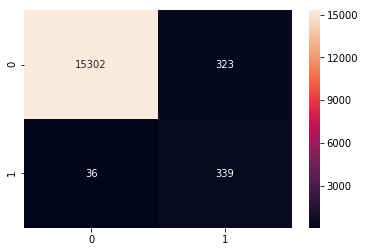

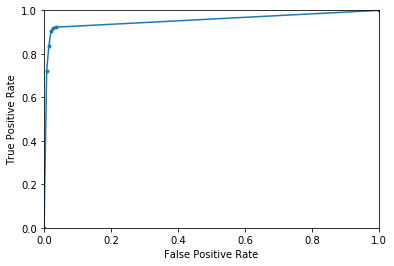

The AUC score for KNN classifier is 0.9542976000000001


In [550]:
c_mat_test,c_mat_imb = data_conf_matrix(l_test_baPCA,
                                        KNN_pr_test_aPCA,
                                        l_tr_aPCA_imb,
                                        KNN_pr_tr_aPCA_imb)

AUC_score,Thres = data_rocauc(l_test_baPCA,
                            KNN_pr_test_aPCA,
                            prob)

print("The AUC score for KNN classifier is",AUC_score)


In [551]:
cl_rep = data_report(l_test_baPCA,
                     KNN_pr_test_aPCA)
print(cl_rep)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.51      0.90      0.65       375

   micro avg       0.98      0.98      0.98     16000
   macro avg       0.75      0.94      0.82     16000
weighted avg       0.99      0.98      0.98     16000



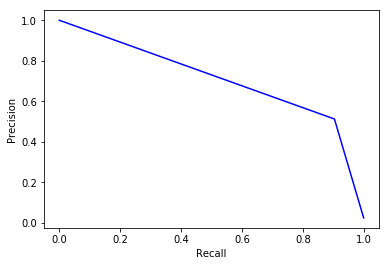

In [552]:
data_prcurve(l_test_baPCA,KNN_pr_test_aPCA)

In [553]:
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(c_mat_test)
print("Total accuracy = ",Tot_ac)
print("Sensitivity = ",Sens)
print("Specificity = ",Spec)
print("F1 score = ",F1_score)
print("Precision = ",Precision)
print("Recall = ",Recall)
print("FPR = ",FPR )
print("TPR = ",TPR)
Tot_ac,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost1 = cost_function(c_mat_imb)
print("Total cost for training data = ",Total_cost1)
print("Total cost for test data = ",Total_cost)


Total accuracy =  16000
Sensitivity =  0.5120845921450151
Specificity =  0.9976528882514017
F1 score =  0.6538090646094504
Precision =  0.5120845921450151
Recall =  0.904
FPR =  0.020672
TPR =  0.904
Total cost for training data =  3620
Total cost for test data =  21230


### KNN classifier with Average Cost using Stratified K-fold Cross Validation

In [554]:
#function to find Gaussian Classifier with cross validation
def KNN_classifier1(d_tr,l_tr,d_test,l_test):
    model =  KNeighborsClassifier(n_neighbors=5)
    model.fit(d_tr,l_tr)
    KNN_pr_tr = model.predict(d_tr)
    KNN_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return KNN_pr_tr,KNN_pr_test,prob;

In [555]:
from sklearn.model_selection import StratifiedKFold
tr_acs = [];
test_acs = [];
tr_cost = [];
test_cost = [];
Tot_accs = [];
Senss = [];
Specs = [];
Precisions = [];
Recalls = [];
F1_scores = [];
FPRs = [];
TPRs = [];

obj = StratifiedKFold(n_splits = 5,random_state = None, shuffle = True)
#obj.get_n_splits(data_train_after_PCA,label_train_beforeafter_PCA)
for id_tr,id_test in obj.split(d_tr_bal_aPCA,l_tr_baPCA):
    d_tr, d_test = d_tr_bal_aPCA[id_tr], d_tr_bal_aPCA[id_test]
    l_tr, l_test = l_tr_baPCA[id_tr], l_tr_baPCA[id_test]
    tr_pr,test_pr,probs = KNN_classifier1(d_tr, l_tr, d_test, l_test)
    tr_ac = data_acc(l_tr,tr_pr)
    tr_acs.append(tr_ac)
    
    test_ac = data_acc(l_test,test_pr)
    test_acs.append(test_ac)
    
    x = confusion_matrix(l_test,test_pr)
    Tot_acc,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(x)
    
    x1 = confusion_matrix(l_tr,tr_pr)
    Tot_ac_tr,Sens_tr,Spec_tr,Precision_tr,Recall_tr,F1_score_tr,FPR_tr,TPR_tr,Total_cost1 = cost_function(x1)
    
    Tot_accs.append(Tot_acc)
    Senss.append(Sens)
    Specs.append(Spec)
    Precisions.append(Precision)
    Recalls.append(Recall)
    F1_scores.append(F1_score)
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    tr_cost.append(Total_cost1)
    test_cost.append(Total_cost)
    
    
    
    

In [556]:
print("The training accuracy for KNN with cross validation is ",np.mean(tr_acs))
print("The testing accuracy for KNN with cross validation is ",np.mean(test_acs))
print("Sensitivity is ",np.mean(Senss))
print("Specificity is ",np.mean(Specs))
print("Precision is ",np.mean(Precisions))
print("Recall is ",np.mean(Recalls))
print("F1 score is ",np.mean(F1_scores))
print("FPR is ",np.mean(FPRs))
print("TPR is ",np.mean(TPRs))
print("Training data cost is ",np.mean(tr_cost))
print("Testing data cost is ",np.mean(test_cost))

The training accuracy for KNN with cross validation is  99.09234209654437
The testing accuracy for KNN with cross validation is  98.71605751187501
Sensitivity is  0.9761066110219065
Specificity is  0.9987503917125423
Precision is  0.9761066110219065
Recall is  0.9987795834420753
F1 score is  0.9873105593727527
FPR is  0.024458433204575213
TPR is  0.9987795834420753
Training data cost is  7854.0
Testing data cost is  3362.0


### KNN  Forest classifier Model Selection

In [557]:
def KNN_classifier3(d_tr,l_tr,d_test,l_test,i):
    model =  KNeighborsClassifier(n_neighbors=i)
    model.fit(d_tr,l_tr)
    KNN_pr_tr = model.predict(d_tr)
    KNN_pr_test = model.predict(d_test)
    prob = model.predict_proba(d_test)
    
    return KNN_pr_tr,KNN_pr_test,prob;

In [558]:
from sklearn.model_selection import StratifiedKFold
tr_acs, tr_acc1, tr_acc25, tr_acc100 = [],[],[],[];
test_acs, test_acc1, test_acc25, test_acc100 = [],[],[],[];
tr_cost,tr_cost1,tr_cost25,tr_cost100 = [],[],[],[];
test_cost,test_cost1,test_cost25,test_cost100 = [],[],[],[];
Tot_accs,Tot_acc1,Tot_acc25,Tot_acc100 = [],[],[],[];
Senss,Sens1,Sens25,Sens100 = [],[],[],[];
Specs,Spec1,Spec25,Spec100 = [],[],[],[];
Precisions,Precision1,Precision25,Precision100 = [],[],[],[];
Recalls,Recall1,Recall25,Recall100 = [],[],[],[];
F1_scores,F1_score1,F1_score25,F1_score100  = [],[],[],[];
FPRs,FPR1,FPR25,FPR100 = [],[],[],[];
TPRs,TPR1,TPR25,TPR100 = [],[],[],[];

Cvalues = [1, 25, 100]
for i in Cvalues:
    obj = StratifiedKFold(n_splits = 3,random_state = None, shuffle = True)
    for id_tr,id_test in obj.split(d_tr_bal_aPCA,l_tr_baPCA):
        d_tr, d_test = d_tr_bal_aPCA[id_tr], d_tr_bal_aPCA[id_test]
        l_tr, l_test = l_tr_baPCA[id_tr], l_tr_baPCA[id_test]
        tr_pr,test_pr,probs = KNN_classifier3(d_tr, l_tr, d_test, l_test,i)
        tr_ac = data_acc(l_tr,tr_pr)
        tr_acs.append(tr_ac)

        test_ac = data_acc(l_test,test_pr)
        test_acs.append(test_ac)

        x = confusion_matrix(l_test,test_pr)
        Tot_acc,Sens,Spec,Precision,Recall,F1_score,FPR,TPR,Total_cost = cost_function(x)

        x1 = confusion_matrix(l_tr,tr_pr)
        Tot_ac_tr,Sens_tr,Spec_tr,Precision_tr,Recall_tr,F1_score_tr,FPR_tr,TPR_tr,Total_cost1 = cost_function(x1)

        Tot_accs.append(Tot_acc)
        Senss.append(Sens)
        Specs.append(Spec)
        Precisions.append(Precision)
        Recalls.append(Recall)
        F1_scores.append(F1_score)
        FPRs.append(FPR)
        TPRs.append(TPR)

        tr_cost.append(Total_cost1)
        test_cost.append(Total_cost)
    
    if(i == 1):
        tr_acc1.append(np.mean(tr_acs))
        test_acc1.append(np.mean(test_acs))
        Tot_acc1.append(np.mean(Tot_accs))
        Sens1.append(np.mean(Senss))
        Spec1.append(np.mean(Specs))
        Precision1.append(np.mean(Precisions))
        Recall1.append(np.mean(Recalls))
        F1_score1.append(np.mean(F1_scores))
        FPR1.append(np.mean(FPRs))
        TPR1.append(np.mean(TPRs))
        tr_cost1.append(np.mean(tr_cost))
        test_cost1.append(np.mean(test_cost))
    
    elif(i == 25):
        tr_acc25.append(np.mean(tr_acs))
        test_acc25.append(np.mean(test_acs))
        Tot_acc25.append(np.mean(Tot_accs))
        Sens25.append(np.mean(Senss))
        Spec25.append(np.mean(Specs))
        Precision25.append(np.mean(Precisions))
        Recall25.append(np.mean(Recalls))
        F1_score25.append(np.mean(F1_scores))
        FPR25.append(np.mean(FPRs))
        TPR25.append(np.mean(TPRs))
        tr_cost25.append(np.mean(tr_cost))
        test_cost25.append(np.mean(test_cost))
        
    elif(i == 100):
        tr_acc100.append(np.mean(tr_acs))
        test_acc100.append(np.mean(test_acs))
        Tot_acc100.append(np.mean(Tot_accs))
        Sens100.append(np.mean(Senss))
        Spec100.append(np.mean(Specs))
        Precision100.append(np.mean(Precisions))
        Recall100.append(np.mean(Recalls))
        F1_score100.append(np.mean(F1_scores))
        FPR100.append(np.mean(FPRs))
        TPR100.append(np.mean(TPRs))
        tr_cost100.append(np.mean(tr_cost))
        test_cost100.append(np.mean(test_cost))
        


In [559]:
print("**************************Metrics when number of Neighbours = 1*****************************")

print("Sensitivity is ",Sens1)
print("Specificity is ",Spec1)
print("Precision is ",Precision1)
print("Recall is ",Recall1)
print("F1 score is ",F1_score1)
print("FPR is ",FPR1)
print("TPR is ",TPR1)
print("Training data cost is ",tr_cost1)
print("Testing data cost is ",test_cost1)
print("                                                                         ")
print("**************************Metrics when number of Neighbours = 25*****************************")

print("Sensitivity is ",Sens25)
print("Specificity is ",Spec25)
print("Precision is ",Precision25)
print("Recall is ",Recall25)
print("F1 score is ",F1_score25)
print("FPR is ",FPR25)
print("TPR is ",TPR25)
print("Training data cost is ",tr_cost25)
print("Testing data cost is ",test_cost25)
print("                                                                         ")
print("**************************Metrics when number of Neighbours = 500*****************************")

print("Sensitivity is ",Sens100)
print("Specificity is ",Spec100)
print("Precision is ",Precision100)
print("Recall is ",Recall100)
print("F1 score is ",F1_score100)
print("FPR is ",FPR100)
print("TPR is ",TPR100)
print("Training data cost is ",tr_cost100)
print("Testing data cost is ",test_cost100)

**************************Metrics when number of Neighbours = 1*****************************
Sensitivity is  [0.9866013178067602]
Specificity is  [0.9996391137784849]
Precision is  [0.9866013178067602]
Recall is  [0.999644045386831]
F1 score is  [0.9930796625855711]
FPR is  [0.013576770267446477]
TPR is  [0.999644045386831]
Training data cost is  [0.0]
Testing data cost is  [2056.6666666666665]
                                                                         
**************************Metrics when number of Neighbours = 25*****************************
Sensitivity is  [0.9739899078498443]
Specificity is  [0.9964786463923909]
Precision is  [0.9739899078498443]
Recall is  [0.9965931061261486]
F1 score is  [0.9851374109717878]
FPR is  [0.026746625563298116]
TPR is  [0.9965931061261486]
Training data cost is  [21036.666666666668]
Testing data cost is  [12920.0]
                                                                         
**************************Metrics when number of 

In [560]:
#Comparison and Best model selection
F1_scores = np.array([F1_score1,F1_score25,F1_score100])
Test_costs = np.array([test_cost1,test_cost25,test_cost100])
bestf1 = np.argmax(F1_scores)
besttc = np.argmin(Test_costs)

if (bestf1 == 0 and besttc == 0):
    print("The best model for KNN is with number of Neighbours = 1")
    
elif (bestf1 == 1 and besttc == 1):
    print("The best model for KNN is with number of Neighbours = 25")

elif (bestf1 == 2 and besttc == 2):
    print("The best model for KNN is with number of Neighbours = 100")



The best model for KNN is with number of Neighbours = 1
